# The Mechanisms Behind Image Classification Using a Pretrained CNN Model in High-Dimensional Spaces

# 📜 Introduction <a class="anchor" id="introduction"></a>

The task at hand is to classify satellite images from the EuroSAT dataset into one of ten classes, namely :
* AnnualCrop
* Forest
* HerbaceousVegetation
* HighwayIndustrial
* Pasture
* PermanentCrop
* Residential
* River
* SeaLake

![eurosat](eurosat-rgb-c.png)

The EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral bands and composed of 10 classes with 27,000 labeled and georeferenced samples.

To accomplish this task, a pre-trained Convolutional Neural Network (CNN) will be used with transfer learning techniques, which involves adapting an existing model to a new task by fine-tuning its parameters.

Transfer learning has become a popular approach in deep learning due to its ability to leverage the knowledge learned from one task and apply it to another related task.  In transfer learning, the pre-trained model acts as a feature extractor, where the early layers of the model learn general features that can be applied to various tasks, while the later layers learn task-specific features. By fine-tuning the pre-trained model's parameters, the model can be adapted to the new task with improved performance compared to training a new model from scratch. 

It is often used in computer vision because it allows for effective training of deep learning models with:
* limited amounts of labeled data
* helps to overcome the problem of overfitting
* can improve the accuracy of the model compared to training from scratch.

The objective of this project is to identify the key features that are important for classifying satellite images into the ten different classes using transfer learning techniques. By understanding the features that are important for image classification in this domain, we can gain insights into the characteristics of each class and potentially improve the accuracy of the model.

# 📚 Table of contents: 

- 1. [Prepare environement](#dim1)
- 2. [Data Exploration](#dim2)
- 3. [Data Processing](#dim3)
- 4. [Model strategy & transfer](#dim4)
- 5. [Model training & model loading](#dim5)
- 6. [Model evaluation](#dim7)
- 7. [Conclusion](#dim10)


#  <a id="dim1"></a> 1. Prepare environement

This step involves setting up the necessary tools and libraries to work with the EuroSAT dataset.

## Installation

In [3]:
!pip install torchvision

In [4]:
!pip install split-folders

## Importing libraries

In [5]:
import pickle
import plotly.express as px
from skimage import io
import torch
from torchvision import models
import torchvision
import torch.nn as nn
import numpy as np
import random
from IPython.display import clear_output
import time
import os.path
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.optim.lr_scheduler
import torch.nn.init
from torch.autograd import Variable
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import os
import glob
from PIL import Image
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision

In [6]:
import glob

## Load data

In [7]:
EuroSat_Type = 'RGB'    # use 'RGB' or 'ALL' for type of Eurosat Dataset. Just change in this line. Rest of the code is managed for both type
lr = 0.01               # learn_rate
milestones = [50,75,90] # multistep scheduler
epochs = 100            # no of epochs

In [8]:
def iloader(path):
    image = np.asarray((io.imread(path))/32000,dtype='float32')
    return image.transpose(2,0,1)

In [9]:
def Load_data():
    if EuroSat_Type == 'RGB':
      data = torchvision.datasets.DatasetFolder(root=root,loader = iloader, transform=None, extensions = 'jpg')
    elif EuroSat_Type == 'ALL':
      data = torchvision.datasets.DatasetFolder(root=root,loader = iloader, transform=None, extensions = 'tif')
    train_set, val_set = train_test_split(data, test_size=0.2, stratify=data.targets)
    #print(np.unique(train_set, return_counts=True))  #uncomment for class IDs
    #print(np.unique(val_set, return_counts=True))    #uncomment for class IDs
      
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True, num_workers=3, drop_last = True)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=16, shuffle=True, num_workers=0, drop_last = True)
    #test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=True, num_workers=0, drop_last = True)
    return train_loader, val_loader #,test_loader

In [10]:
if EuroSat_Type == 'RGB':
  data_folder = '/content/sample_data/'
  #root = os.path.join(data_folder, '2750/')
  root = '2750/'
  download_ON = os.path.exists(root)

  if not download_ON:
    # This can be long...
    #os.chdir(data_folder)
    os.system('wget http://madm.dfki.de/files/sentinel/EuroSAT.zip') #Just RGB Bands
    !unzip EuroSAT.zip
    download_ON = True
elif EuroSat_Type == 'ALL':
    root = 'ds/images/remote_sensing/otherDatasets/sentinel_2/tif/'
    download_ON = os.path.exists(root)
    if not download_ON:
      os.system('wget http://madm.dfki.de/files/sentinel/EuroSATallBands.zip') #All bands
      !unzip EuroSATallBands.zip
      download_ON = True

Archive:  EuroSAT.zip
   creating: 2750/
   creating: 2750/River/
  inflating: 2750/River/River_479.jpg  
  inflating: 2750/River/River_2178.jpg  
  inflating: 2750/River/River_65.jpg  
  inflating: 2750/River/River_1643.jpg  
  inflating: 2750/River/River_191.jpg  
  inflating: 2750/River/River_636.jpg  
  inflating: 2750/River/River_2490.jpg  
  inflating: 2750/River/River_2337.jpg  
  inflating: 2750/River/River_982.jpg  
  inflating: 2750/River/River_257.jpg  
  inflating: 2750/River/River_1585.jpg  
  inflating: 2750/River/River_1222.jpg  
  inflating: 2750/River/River_1926.jpg  
  inflating: 2750/River/River_1554.jpg  
  inflating: 2750/River/River_953.jpg  
  inflating: 2750/River/River_521.jpg  
  inflating: 2750/River/River_286.jpg  
  inflating: 2750/River/River_2441.jpg  
  inflating: 2750/River/River_140.jpg  
  inflating: 2750/River/River_1135.jpg  
  inflating: 2750/River/River_1692.jpg  
  inflating: 2750/River/River_2020.jpg  
  inflating: 2750/River/River_1470.jpg  
  

  inflating: 2750/River/River_341.jpg  
  inflating: 2750/River/River_894.jpg  
  inflating: 2750/River/River_720.jpg  
  inflating: 2750/River/River_1755.jpg  
  inflating: 2750/River/River_1784.jpg  
  inflating: 2750/River/River_1023.jpg  
  inflating: 2750/River/River_2136.jpg  
  inflating: 2750/River/River_390.jpg  
  inflating: 2750/River/River_845.jpg  
  inflating: 2750/River/River_437.jpg  
  inflating: 2750/River/River_1830.jpg  
  inflating: 2750/River/River_1442.jpg  
  inflating: 2750/River/River_1968.jpg  
  inflating: 2750/River/River_219.jpg  
  inflating: 2750/River/River_2379.jpg  
  inflating: 2750/River/River_678.jpg  
  inflating: 2750/River/River_1348.jpg  
  inflating: 2750/River/River_1729.jpg  
  inflating: 2750/River/River_57.jpg  
  inflating: 2750/River/River_86.jpg  
  inflating: 2750/River/River_839.jpg  
  inflating: 2750/River/River_1399.jpg  
  inflating: 2750/River/River_1107.jpg  
  inflating: 2750/River/River_172.jpg  
  inflating: 2750/River/River_

  inflating: 2750/River/River_151.jpg  
  inflating: 2750/River/River_1683.jpg  
  inflating: 2750/River/River_1124.jpg  
  inflating: 2750/River/River_1652.jpg  
  inflating: 2750/River/River_627.jpg  
  inflating: 2750/River/River_180.jpg  
  inflating: 2750/River/River_246.jpg  
  inflating: 2750/River/River_993.jpg  
  inflating: 2750/River/River_1233.jpg  
  inflating: 2750/River/River_1594.jpg  
  inflating: 2750/River/River_2326.jpg  
  inflating: 2750/River/River_2481.jpg  
  inflating: 2750/River/River_74.jpg  
  inflating: 2750/River/River_468.jpg  
  inflating: 2750/River/River_2169.jpg  
  inflating: 2750/River/River_1539.jpg  
  inflating: 2750/River/River_1158.jpg  
  inflating: 2750/River/River_1189.jpg  
  inflating: 2750/River/River_1776.jpg  
  inflating: 2750/River/River_703.jpg  
  inflating: 2750/River/River_362.jpg  
  inflating: 2750/River/River_1317.jpg  
  inflating: 2750/River/River_2202.jpg  
  inflating: 2750/River/River_1813.jpg  
  inflating: 2750/River/Ri

  inflating: 2750/River/River_992.jpg  
  inflating: 2750/River/River_247.jpg  
  inflating: 2750/River/River_1595.jpg  
  inflating: 2750/River/River_1232.jpg  
  inflating: 2750/River/River_75.jpg  
  inflating: 2750/River/River_469.jpg  
  inflating: 2750/River/River_2168.jpg  
  inflating: 2750/River/River_1538.jpg  
  inflating: 2750/River/River_1159.jpg  
  inflating: 2750/River/River_1188.jpg  
  inflating: 2750/River/River_1777.jpg  
  inflating: 2750/River/River_702.jpg  
  inflating: 2750/River/River_2203.jpg  
  inflating: 2750/River/River_363.jpg  
  inflating: 2750/River/River_1316.jpg  
  inflating: 2750/River/River_1812.jpg  
  inflating: 2750/River/River_1460.jpg  
  inflating: 2750/River/River_867.jpg  
  inflating: 2750/River/River_415.jpg  
  inflating: 2750/River/River_1001.jpg  
  inflating: 2750/River/River_2114.jpg  
  inflating: 2750/River/River_938.jpg  
  inflating: 2750/River/River_1298.jpg  
  inflating: 2750/River/River_1628.jpg  
  inflating: 2750/River/Ri

  inflating: 2750/River/River_504.jpg  
  inflating: 2750/River/River_976.jpg  
  inflating: 2750/River/River_2464.jpg  
  inflating: 2750/River/River_91.jpg  
  inflating: 2750/River/River_1048.jpg  
  inflating: 2750/River/River_1429.jpg  
  inflating: 2750/River/River_1099.jpg  
  inflating: 2750/River/River_40.jpg  
  inflating: 2750/River/River_2079.jpg  
  inflating: 2750/River/River_119.jpg  
  inflating: 2750/River/River_2418.jpg  
  inflating: 2750/River/River_578.jpg  
  inflating: 2750/River/River_1034.jpg  
  inflating: 2750/River/River_1793.jpg  
  inflating: 2750/River/River_2121.jpg  
  inflating: 2750/River/River_1827.jpg  
  inflating: 2750/River/River_1455.jpg  
  inflating: 2750/River/River_852.jpg  
  inflating: 2750/River/River_420.jpg  
  inflating: 2750/River/River_387.jpg  
  inflating: 2750/River/River_2236.jpg  
  inflating: 2750/River/River_883.jpg  
  inflating: 2750/River/River_356.jpg  
  inflating: 2750/River/River_1484.jpg  
  inflating: 2750/River/River

  inflating: 2750/River/River_1858.jpg  
  inflating: 2750/River/River_2298.jpg  
  inflating: 2750/River/River_799.jpg  
  inflating: 2750/River/River_92.jpg  
  inflating: 2750/River/River_43.jpg  
  inflating: 2750/River/River_748.jpg  
  inflating: 2750/River/River_2249.jpg  
  inflating: 2750/River/River_1889.jpg  
  inflating: 2750/River/River_329.jpg  
  inflating: 2750/River/River_1619.jpg  
  inflating: 2750/River/River_1278.jpg  
  inflating: 2750/River/River_909.jpg  
  inflating: 2750/River/River_423.jpg  
  inflating: 2750/River/River_851.jpg  
  inflating: 2750/River/River_384.jpg  
  inflating: 2750/River/River_1456.jpg  
  inflating: 2750/River/River_1824.jpg  
  inflating: 2750/River/River_2122.jpg  
  inflating: 2750/River/River_1037.jpg  
  inflating: 2750/River/River_1790.jpg  
  inflating: 2750/River/River_734.jpg  
  inflating: 2750/River/River_1741.jpg  
  inflating: 2750/River/River_1487.jpg  
  inflating: 2750/River/River_1320.jpg  
  inflating: 2750/River/Rive

  inflating: 2750/River/River_1956.jpg  
  inflating: 2750/River/River_1283.jpg  
  inflating: 2750/River/River_551.jpg  
  inflating: 2750/River/River_923.jpg  
  inflating: 2750/River/River_2431.jpg  
  inflating: 2750/River/River_2396.jpg  
  inflating: 2750/River/River_809.jpg  
  inflating: 2750/River/River_1378.jpg  
  inflating: 2750/River/River_1719.jpg  
  inflating: 2750/River/River_67.jpg  
  inflating: 2750/River/River_2335.jpg  
  inflating: 2750/River/River_2492.jpg  
  inflating: 2750/River/River_1220.jpg  
  inflating: 2750/River/River_1587.jpg  
  inflating: 2750/River/River_255.jpg  
  inflating: 2750/River/River_980.jpg  
  inflating: 2750/River/River_634.jpg  
  inflating: 2750/River/River_193.jpg  
  inflating: 2750/River/River_1641.jpg  
  inflating: 2750/River/River_1690.jpg  
  inflating: 2750/River/River_1137.jpg  
  inflating: 2750/River/River_142.jpg  
  inflating: 2750/River/River_2022.jpg  
  inflating: 2750/River/River_284.jpg  
  inflating: 2750/River/Riv

  inflating: 2750/River/River_1092.jpg  
  inflating: 2750/River/River_2241.jpg  
  inflating: 2750/River/River_1354.jpg  
  inflating: 2750/River/River_1881.jpg  
  inflating: 2750/River/River_321.jpg  
  inflating: 2750/River/River_486.jpg  
  inflating: 2750/River/River_1152.jpg  
  inflating: 2750/River/River_680.jpg  
  inflating: 2750/River/River_127.jpg  
  inflating: 2750/River/River_2047.jpg  
  inflating: 2750/River/River_546.jpg  
  inflating: 2750/River/River_934.jpg  
  inflating: 2750/River/River_1294.jpg  
  inflating: 2750/River/River_1533.jpg  
  inflating: 2750/River/River_1941.jpg  
  inflating: 2750/River/River_2381.jpg  
  inflating: 2750/River/River_2426.jpg  
  inflating: 2750/River/River_2350.jpg  
  inflating: 2750/River/River_1245.jpg  
  inflating: 2750/River/River_1990.jpg  
  inflating: 2750/River/River_230.jpg  
  inflating: 2750/River/River_597.jpg  
  inflating: 2750/River/River_2096.jpg  
  inflating: 2750/River/River_651.jpg  
  inflating: 2750/River/R

  inflating: 2750/River/River_550.jpg  
  inflating: 2750/River/River_922.jpg  
  inflating: 2750/River/River_1808.jpg  
  inflating: 2750/River/River_2219.jpg  
  inflating: 2750/River/River_379.jpg  
  inflating: 2750/River/River_13.jpg  
  inflating: 2750/River/River_718.jpg  
  inflating: 2750/River/River_1981.jpg  
  inflating: 2750/River/River_1254.jpg  
  inflating: 2750/River/River_586.jpg  
  inflating: 2750/River/River_221.jpg  
  inflating: 2750/River/River_2341.jpg  
  inflating: 2750/River/River_640.jpg  
  inflating: 2750/River/River_1192.jpg  
  inflating: 2750/River/River_1635.jpg  
  inflating: 2750/River/River_2087.jpg  
  inflating: 2750/River/River_2056.jpg  
  inflating: 2750/River/River_1143.jpg  
  inflating: 2750/River/River_136.jpg  
  inflating: 2750/River/River_691.jpg  
  inflating: 2750/River/River_2437.jpg  
  inflating: 2750/River/River_2390.jpg  
  inflating: 2750/River/River_925.jpg  
  inflating: 2750/River/River_557.jpg  
  inflating: 2750/River/River

  inflating: 2750/AnnualCrop/AnnualCrop_2343.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2896.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_96.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1637.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1190.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2722.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_471.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_803.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2085.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_148.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_529.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1019.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1478.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_199.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2026.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_375.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2781.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_35.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1133.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1

  inflating: 2750/AnnualCrop/AnnualCrop_1108.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_677.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2283.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2524.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2956.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1396.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1843.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1431.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_216.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2145.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1050.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1726.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1081.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2633.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2194.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_912.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_560.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1347.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1892.jpg  
  inflating: 2750/AnnualCrop/Annual

  inflating: 2750/AnnualCrop/AnnualCrop_2575.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2907.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2203.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_150.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1316.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2662.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_296.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_943.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_531.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1777.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1188.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_469.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1159.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1538.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2168.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2509.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2480.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2327.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1595.jpg  
  inflating: 2750/AnnualCrop/AnnualC

  inflating: 2750/AnnualCrop/AnnualCrop_1842.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1430.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1397.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2525.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2957.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2282.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_676.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1051.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2144.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_217.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_913.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_561.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2195.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2632.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1080.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1727.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_100.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2986.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2253.jpg  
  inflating: 2750/AnnualCrop/AnnualC

  inflating: 2750/AnnualCrop/AnnualCrop_2446.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2330.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2497.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1225.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1582.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2751.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_402.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_870.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1644.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2268.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2609.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_928.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1879.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_308.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_48.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2848.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_769.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1288.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1259.jpg  
  inflating: 2750/AnnualCrop/AnnualCro

  inflating: 2750/AnnualCrop/AnnualCrop_2038.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2459.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1009.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1468.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_189.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_158.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_539.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1246.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1993.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2353.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2886.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_86.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1627.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1180.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2732.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2095.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_813.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_461.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_317.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop

  inflating: 2750/AnnualCrop/AnnualCrop_2709.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2368.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1736.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1091.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2623.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_570.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_902.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2184.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1357.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1882.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2242.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_111.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2997.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2293.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_667.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2946.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2534.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1386.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1421.jpg  
  inflating: 2750/AnnualCrop/Annual

  inflating: 2750/AnnualCrop/AnnualCrop_2979.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_239.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1709.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1368.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_689.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2744.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_865.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_417.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1651.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2325.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2482.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1230.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1597.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1934.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1546.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_700.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2453.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2821.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_21.jpg  
  inflating: 2750/AnnualCrop/AnnualCro

  inflating: 2750/AnnualCrop/AnnualCrop_1095.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1732.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1044.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2151.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_202.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1425.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1857.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1382.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2942.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2530.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_663.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2297.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2009.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2468.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2241.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2994.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_112.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1354.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1881.jpg  
  inflating: 2750/AnnualCrop/Annua

  inflating: 2750/AnnualCrop/AnnualCrop_2528.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2198.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_448.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1178.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_499.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1519.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2692.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_266.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2135.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1787.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1020.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_607.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2926.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2554.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1441.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1833.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1337.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1490.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2222.jpg  
  inflating: 2750/AnnualCrop/Annual

  inflating: 2750/AnnualCrop/AnnualCrop_1143.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1192.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1635.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_94.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_801.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_473.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2087.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2720.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1981.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1254.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2894.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2341.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_959.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2678.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2219.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1808.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_988.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1880.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1355.jpg  
  inflating: 2750/AnnualCrop/AnnualCr

  inflating: 2750/AnnualCrop/AnnualCrop_2820.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_701.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1935.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1547.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2033.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2794.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_360.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_20.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1126.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1681.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2578.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2119.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_83.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1622.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1185.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2737.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2090.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_816.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_464.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop

  inflating: 2750/AnnualCrop/AnnualCrop_872.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_400.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2753.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1646.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2495.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2332.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1580.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1227.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_558.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_139.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1409.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_589.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1068.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2438.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2059.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2088.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_283.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_2677.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_524.jpg  
  inflating: 2750/AnnualCrop/AnnualCro

  inflating: 2750/AnnualCrop/AnnualCrop_2929.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_608.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1338.jpg  
  inflating: 2750/AnnualCrop/AnnualCrop_1759.jpg  
   creating: 2750/HerbaceousVegetation/
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_142.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2829.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_284.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_951.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_523.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1688.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1659.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_255.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_980.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1238.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVege

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_564.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1168.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_105.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1509.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1030.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1797.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2125.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2682.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1451.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1823.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2936.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2544.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2595.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2232.jpg  
  inflat

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2240.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2995.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_759.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1355.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1880.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_338.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2621.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2186.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1734.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1093.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_40.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2364.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1271.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2705.jpg  
  inflatin

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2520.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1392.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1435.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1847.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_972.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_500.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2019.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2478.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_161.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_617.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_276.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1496.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1331.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2583.jpg  
  inflating

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2443.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2831.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1924.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1556.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2022.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2785.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_949.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1137.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1690.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2569.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_411.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_863.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2108.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_367.jpg  
  inflatin

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2468.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_171.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_448.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2151.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1044.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_97.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2297.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2530.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2942.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1382.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1857.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1425.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1353.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1886.jpg  
  inflatin

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_282.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_525.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_957.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_253.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_986.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_632.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_195.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1599.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_73.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1707.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2612.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1366.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2273.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2505.jpg  
  inflating: 27

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1632.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2893.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2346.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1986.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1253.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1957.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1525.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1282.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2430.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2842.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2397.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_129.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1144.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_548.jpg  
  inflat

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2011.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1565.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1917.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2802.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2470.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_169.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2306.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1213.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2767.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1672.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2585.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2222.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1490.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1337.jpg  
  infla

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1841.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1433.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_798.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2281.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2526.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2954.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_506.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_974.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_167.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1919.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2308.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_611.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_270.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2769.jpg  
  inflating:

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2848.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2104.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1011.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2565.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2917.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1802.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1470.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1306.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2213.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_13.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1767.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2672.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_652.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_233.jpg  
  inflatin

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_577.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_201.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2718.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2379.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_660.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_53.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1727.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1080.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2632.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_3.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2195.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1346.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1893.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2253.jpg  
  inflating: 2

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_346.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_727.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2599.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2775.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1660.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2314.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1201.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1577.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1905.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2810.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2462.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1116.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2003.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_968.jpg  
  inflati

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1075.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_479.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2160.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1866.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1414.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2501.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2973.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1151.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2044.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1530.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1942.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1297.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2857.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2425.jpg  
  infla

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_165.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1569.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_976.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_504.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1108.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_272.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_613.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_883.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_356.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_737.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2589.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2558.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_420.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_852.jpg  
  inflating: 275

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_770.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_69.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_311.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2608.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2331.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2496.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_628.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1224.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1583.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_249.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2750.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1645.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1694.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1133.jpg  
  inflating:

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_280.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1938.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_146.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2329.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_197.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_630.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_984.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_251.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2748.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1364.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2271.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_768.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1705.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_71.jpg  
  inflating: 27

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2823.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_148.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1936.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1544.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1232.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1595.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_199.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2327.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2480.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1653.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2746.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_766.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_307.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_471.jpg  
  inflating

  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_391.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_895.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_340.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2659.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_38.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2238.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_721.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_264.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1668.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_605.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_1209.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_173.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_2818.jpg  
  inflating: 2750/HerbaceousVegetation/HerbaceousVegetation_960.jpg  
  inflating: 275

  inflating: 2750/Industrial/Industrial_729.jpg  
  inflating: 2750/Industrial/Industrial_1854.jpg  
  inflating: 2750/Industrial/Industrial_1426.jpg  
  inflating: 2750/Industrial/Industrial_2152.jpg  
  inflating: 2750/Industrial/Industrial_348.jpg  
  inflating: 2750/Industrial/Industrial_1047.jpg  
  inflating: 2750/Industrial/Industrial_676.jpg  
  inflating: 2750/Industrial/Industrial_32.jpg  
  inflating: 2750/Industrial/Industrial_1579.jpg  
  inflating: 2750/Industrial/Industrial_217.jpg  
  inflating: 2750/Industrial/Industrial_1118.jpg  
  inflating: 2750/Industrial/Industrial_6.jpg  
  inflating: 2750/Industrial/Industrial_561.jpg  
  inflating: 2750/Industrial/Industrial_913.jpg  
  inflating: 2750/Industrial/Industrial_100.jpg  
  inflating: 2750/Industrial/Industrial_1091.jpg  
  inflating: 2750/Industrial/Industrial_1736.jpg  
  inflating: 2750/Industrial/Industrial_439.jpg  
  inflating: 2750/Industrial/Industrial_2184.jpg  
  inflating: 2750/Industrial/Industrial_1882

  inflating: 2750/Industrial/Industrial_1493.jpg  
  inflating: 2750/Industrial/Industrial_1334.jpg  
  inflating: 2750/Industrial/Industrial_970.jpg  
  inflating: 2750/Industrial/Industrial_502.jpg  
  inflating: 2750/Industrial/Industrial_80.jpg  
  inflating: 2750/Industrial/Industrial_163.jpg  
  inflating: 2750/Industrial/Industrial_2379.jpg  
  inflating: 2750/Industrial/Industrial_1968.jpg  
  inflating: 2750/Industrial/Industrial_615.jpg  
  inflating: 2750/Industrial/Industrial_51.jpg  
  inflating: 2750/Industrial/Industrial_274.jpg  
  inflating: 2750/Industrial/Industrial_1397.jpg  
  inflating: 2750/Industrial/Industrial_1842.jpg  
  inflating: 2750/Industrial/Industrial_1430.jpg  
  inflating: 2750/Industrial/Industrial_2282.jpg  
  inflating: 2750/Industrial/Industrial_1051.jpg  
  inflating: 2750/Industrial/Industrial_2144.jpg  
  inflating: 2750/Industrial/Industrial_2195.jpg  
  inflating: 2750/Industrial/Industrial_1727.jpg  
  inflating: 2750/Industrial/Industrial_

  inflating: 2750/Industrial/Industrial_778.jpg  
  inflating: 2750/Industrial/Industrial_1805.jpg  
  inflating: 2750/Industrial/Industrial_1477.jpg  
  inflating: 2750/Industrial/Industrial_994.jpg  
  inflating: 2750/Industrial/Industrial_241.jpg  
  inflating: 2750/Industrial/Industrial_187.jpg  
  inflating: 2750/Industrial/Industrial_1288.jpg  
  inflating: 2750/Industrial/Industrial_620.jpg  
  inflating: 2750/Industrial/Industrial_64.jpg  
  inflating: 2750/Industrial/Industrial_1259.jpg  
  inflating: 2750/Industrial/Industrial_156.jpg  
  inflating: 2750/Industrial/Industrial_1638.jpg  
  inflating: 2750/Industrial/Industrial_945.jpg  
  inflating: 2750/Industrial/Industrial_537.jpg  
  inflating: 2750/Industrial/Industrial_290.jpg  
  inflating: 2750/Industrial/Industrial_2213.jpg  
  inflating: 2750/Industrial/Industrial_1306.jpg  
  inflating: 2750/Industrial/Industrial_1767.jpg  
  inflating: 2750/Industrial/Industrial_468.jpg  
  inflating: 2750/Industrial/Industrial_101

  inflating: 2750/Industrial/Industrial_1855.jpg  
  inflating: 2750/Industrial/Industrial_1427.jpg  
  inflating: 2750/Industrial/Industrial_728.jpg  
  inflating: 2750/Industrial/Industrial_1380.jpg  
  inflating: 2750/Industrial/Industrial_2295.jpg  
  inflating: 2750/Industrial/Industrial_1046.jpg  
  inflating: 2750/Industrial/Industrial_349.jpg  
  inflating: 2750/Industrial/Industrial_2153.jpg  
  inflating: 2750/Industrial/Industrial_2355.jpg  
  inflating: 2750/Industrial/Industrial_1995.jpg  
  inflating: 2750/Industrial/Industrial_1240.jpg  
  inflating: 2750/Industrial/Industrial_2093.jpg  
  inflating: 2750/Industrial/Industrial_1186.jpg  
  inflating: 2750/Industrial/Industrial_289.jpg  
  inflating: 2750/Industrial/Industrial_1621.jpg  
  inflating: 2750/Industrial/Industrial_258.jpg  
  inflating: 2750/Industrial/Industrial_1157.jpg  
  inflating: 2750/Industrial/Industrial_2042.jpg  
  inflating: 2750/Industrial/Industrial_639.jpg  
  inflating: 2750/Industrial/Industr

  inflating: 2750/Industrial/Industrial_1300.jpg  
  inflating: 2750/Industrial/Industrial_2215.jpg  
  inflating: 2750/Industrial/Industrial_1761.jpg  
  inflating: 2750/Industrial/Industrial_2102.jpg  
  inflating: 2750/Industrial/Industrial_1017.jpg  
  inflating: 2750/Industrial/Industrial_318.jpg  
  inflating: 2750/Industrial/Industrial_1804.jpg  
  inflating: 2750/Industrial/Industrial_1476.jpg  
  inflating: 2750/Industrial/Industrial_779.jpg  
  inflating: 2750/Industrial/Industrial_240.jpg  
  inflating: 2750/Industrial/Industrial_995.jpg  
  inflating: 2750/Industrial/Industrial_621.jpg  
  inflating: 2750/Industrial/Industrial_65.jpg  
  inflating: 2750/Industrial/Industrial_1289.jpg  
  inflating: 2750/Industrial/Industrial_186.jpg  
  inflating: 2750/Industrial/Industrial_157.jpg  
  inflating: 2750/Industrial/Industrial_1258.jpg  
  inflating: 2750/Industrial/Industrial_291.jpg  
  inflating: 2750/Industrial/Industrial_944.jpg  
  inflating: 2750/Industrial/Industrial_53

  inflating: 2750/Industrial/Industrial_1923.jpg  
  inflating: 2750/Industrial/Industrial_1551.jpg  
  inflating: 2750/Industrial/Industrial_2444.jpg  
  inflating: 2750/Industrial/Industrial_598.jpg  
  inflating: 2750/Industrial/Industrial_1697.jpg  
  inflating: 2750/Industrial/Industrial_1130.jpg  
  inflating: 2750/Industrial/Industrial_2025.jpg  
  inflating: 2750/Industrial/Industrial_1646.jpg  
  inflating: 2750/Industrial/Industrial_549.jpg  
  inflating: 2750/Industrial/Industrial_2332.jpg  
  inflating: 2750/Industrial/Industrial_2495.jpg  
  inflating: 2750/Industrial/Industrial_1227.jpg  
  inflating: 2750/Industrial/Industrial_128.jpg  
  inflating: 2750/Industrial/Industrial_1580.jpg  
  inflating: 2750/Industrial/Industrial_1762.jpg  
  inflating: 2750/Industrial/Industrial_2216.jpg  
  inflating: 2750/Industrial/Industrial_1303.jpg  
  inflating: 2750/Industrial/Industrial_1475.jpg  
  inflating: 2750/Industrial/Industrial_1807.jpg  
  inflating: 2750/Industrial/Indus

  inflating: 2750/Industrial/Industrial_975.jpg  
  inflating: 2750/Industrial/Industrial_507.jpg  
  inflating: 2750/Industrial/Industrial_1608.jpg  
  inflating: 2750/Industrial/Industrial_271.jpg  
  inflating: 2750/Industrial/Industrial_610.jpg  
  inflating: 2750/Industrial/Industrial_54.jpg  
  inflating: 2750/Industrial/Industrial_880.jpg  
  inflating: 2750/Industrial/Industrial_355.jpg  
  inflating: 2750/Industrial/Industrial_2289.jpg  
  inflating: 2750/Industrial/Industrial_1849.jpg  
  inflating: 2750/Industrial/Industrial_734.jpg  
  inflating: 2750/Industrial/Industrial_1898.jpg  
  inflating: 2750/Industrial/Industrial_2258.jpg  
  inflating: 2750/Industrial/Industrial_423.jpg  
  inflating: 2750/Industrial/Industrial_851.jpg  
  inflating: 2750/Industrial/Industrial_384.jpg  
  inflating: 2750/Industrial/Industrial_2300.jpg  
  inflating: 2750/Industrial/Industrial_1215.jpg  
  inflating: 2750/Industrial/Industrial_909.jpg  
  inflating: 2750/Industrial/Industrial_1674

  inflating: 2750/Industrial/Industrial_2412.jpg  
  inflating: 2750/Industrial/Industrial_608.jpg  
  inflating: 2750/Industrial/Industrial_1507.jpg  
  inflating: 2750/Industrial/Industrial_1975.jpg  
  inflating: 2750/Industrial/Industrial_1271.jpg  
  inflating: 2750/Industrial/Industrial_2364.jpg  
  inflating: 2750/Industrial/Industrial_1610.jpg  
  inflating: 2750/Industrial/Industrial_781.jpg  
  inflating: 2750/Industrial/Industrial_1329.jpg  
  inflating: 2750/Industrial/Industrial_1748.jpg  
  inflating: 2750/Industrial/Industrial_447.jpg  
  inflating: 2750/Industrial/Industrial_835.jpg  
  inflating: 2750/Industrial/Industrial_331.jpg  
  inflating: 2750/Industrial/Industrial_496.jpg  
  inflating: 2750/Industrial/Industrial_1799.jpg  
  inflating: 2750/Industrial/Industrial_750.jpg  
  inflating: 2750/Industrial/Industrial_924.jpg  
  inflating: 2750/Industrial/Industrial_556.jpg  
  inflating: 2750/Industrial/Industrial_1659.jpg  
  inflating: 2750/Industrial/Industrial_

  inflating: 2750/Industrial/Industrial_973.jpg  
  inflating: 2750/Industrial/Industrial_277.jpg  
  inflating: 2750/Industrial/Industrial_1178.jpg  
  inflating: 2750/Industrial/Industrial_52.jpg  
  inflating: 2750/Industrial/Industrial_616.jpg  
  inflating: 2750/Industrial/Industrial_1519.jpg  
  inflating: 2750/Industrial/Industrial_2132.jpg  
  inflating: 2750/Industrial/Industrial_1780.jpg  
  inflating: 2750/Industrial/Industrial_328.jpg  
  inflating: 2750/Industrial/Industrial_1027.jpg  
  inflating: 2750/Industrial/Industrial_749.jpg  
  inflating: 2750/Industrial/Industrial_1834.jpg  
  inflating: 2750/Industrial/Industrial_1446.jpg  
  inflating: 2750/Industrial/Industrial_1330.jpg  
  inflating: 2750/Industrial/Industrial_1497.jpg  
  inflating: 2750/Industrial/Industrial_798.jpg  
  inflating: 2750/Industrial/Industrial_2225.jpg  
  inflating: 2750/Industrial/Industrial_1751.jpg  
  inflating: 2750/Industrial/Industrial_1268.jpg  
  inflating: 2750/Industrial/Industrial

  inflating: 2750/Industrial/Industrial_152.jpg  
  inflating: 2750/Industrial/Industrial_417.jpg  
  inflating: 2750/Industrial/Industrial_865.jpg  
  inflating: 2750/Industrial/Industrial_1718.jpg  
  inflating: 2750/Industrial/Industrial_1379.jpg  
  inflating: 2750/Industrial/Industrial_700.jpg  
  inflating: 2750/Industrial/Industrial_361.jpg  
  inflating: 2750/Industrial/Industrial_2442.jpg  
  inflating: 2750/Industrial/Industrial_1557.jpg  
  inflating: 2750/Industrial/Industrial_1925.jpg  
  inflating: 2750/Industrial/Industrial_658.jpg  
  inflating: 2750/Industrial/Industrial_2023.jpg  
  inflating: 2750/Industrial/Industrial_1691.jpg  
  inflating: 2750/Industrial/Industrial_1136.jpg  
  inflating: 2750/Industrial/Industrial_239.jpg  
  inflating: 2750/Industrial/Industrial_1640.jpg  
  inflating: 2750/Industrial/Industrial_1221.jpg  
  inflating: 2750/Industrial/Industrial_689.jpg  
  inflating: 2750/Industrial/Industrial_1586.jpg  
  inflating: 2750/Industrial/Industrial

  inflating: 2750/Industrial/Industrial_473.jpg  
  inflating: 2750/Industrial/Industrial_801.jpg  
  inflating: 2750/Industrial/Industrial_2208.jpg  
  inflating: 2750/Industrial/Industrial_5.jpg  
  inflating: 2750/Industrial/Industrial_214.jpg  
  inflating: 2750/Industrial/Industrial_1908.jpg  
  inflating: 2750/Industrial/Industrial_31.jpg  
  inflating: 2750/Industrial/Industrial_675.jpg  
  inflating: 2750/Industrial/Industrial_103.jpg  
  inflating: 2750/Industrial/Industrial_2319.jpg  
  inflating: 2750/Industrial/Industrial_910.jpg  
  inflating: 2750/Industrial/Industrial_562.jpg  
  inflating: 2750/Industrial/Industrial_2241.jpg  
  inflating: 2750/Industrial/Industrial_1881.jpg  
  inflating: 2750/Industrial/Industrial_1354.jpg  
  inflating: 2750/Industrial/Industrial_2187.jpg  
  inflating: 2750/Industrial/Industrial_1092.jpg  
  inflating: 2750/Industrial/Industrial_848.jpg  
  inflating: 2750/Industrial/Industrial_1735.jpg  
  inflating: 2750/Industrial/Industrial_1043

  inflating: 2750/Residential/Residential_1250.jpg  
  inflating: 2750/Residential/Residential_2890.jpg  
  inflating: 2750/Residential/Residential_2345.jpg  
  inflating: 2750/Residential/Residential_664.jpg  
  inflating: 2750/Residential/Residential_1196.jpg  
  inflating: 2750/Residential/Residential_1631.jpg  
  inflating: 2750/Residential/Residential_2083.jpg  
  inflating: 2750/Residential/Residential_2724.jpg  
  inflating: 2750/Residential/Residential_486.jpg  
  inflating: 2750/Residential/Residential_1374.jpg  
  inflating: 2750/Residential/Residential_321.jpg  
  inflating: 2750/Residential/Residential_2261.jpg  
  inflating: 2750/Residential/Residential_1715.jpg  
  inflating: 2750/Residential/Residential_740.jpg  
  inflating: 2750/Residential/Residential_2600.jpg  
  inflating: 2750/Residential/Residential_2176.jpg  
  inflating: 2750/Residential/Residential_1063.jpg  
  inflating: 2750/Residential/Residential_791.jpg  
  inflating: 2750/Residential/Residential_2965.jpg 

  inflating: 2750/Residential/Residential_1217.jpg  
  inflating: 2750/Residential/Residential_2302.jpg  
  inflating: 2750/Residential/Residential_2474.jpg  
  inflating: 2750/Residential/Residential_2806.jpg  
  inflating: 2750/Residential/Residential_1913.jpg  
  inflating: 2750/Residential/Residential_1561.jpg  
  inflating: 2750/Residential/Residential_293.jpg  
  inflating: 2750/Residential/Residential_534.jpg  
  inflating: 2750/Residential/Residential_946.jpg  
  inflating: 2750/Residential/Residential_2015.jpg  
  inflating: 2750/Residential/Residential_1100.jpg  
  inflating: 2750/Residential/Residential_155.jpg  
  inflating: 2750/Residential/Residential_1399.jpg  
  inflating: 2750/Residential/Residential_819.jpg  
  inflating: 2750/Residential/Residential_2959.jpg  
  inflating: 2750/Residential/Residential_91.jpg  
  inflating: 2750/Residential/Residential_40.jpg  
  inflating: 2750/Residential/Residential_1729.jpg  
  inflating: 2750/Residential/Residential_2988.jpg  
  

  inflating: 2750/Residential/Residential_302.jpg  
  inflating: 2750/Residential/Residential_1357.jpg  
  inflating: 2750/Residential/Residential_1421.jpg  
  inflating: 2750/Residential/Residential_1853.jpg  
  inflating: 2750/Residential/Residential_806.jpg  
  inflating: 2750/Residential/Residential_474.jpg  
  inflating: 2750/Residential/Residential_1386.jpg  
  inflating: 2750/Residential/Residential_2946.jpg  
  inflating: 2750/Residential/Residential_2534.jpg  
  inflating: 2750/Residential/Residential_2293.jpg  
  inflating: 2750/Residential/Residential_1040.jpg  
  inflating: 2750/Residential/Residential_2155.jpg  
  inflating: 2750/Residential/Residential_550.jpg  
  inflating: 2750/Residential/Residential_922.jpg  
  inflating: 2750/Residential/Residential_1977.jpg  
  inflating: 2750/Residential/Residential_1505.jpg  
  inflating: 2750/Residential/Residential_2410.jpg  
  inflating: 2750/Residential/Residential_2862.jpg  
  inflating: 2750/Residential/Residential_131.jpg  

  inflating: 2750/Residential/Residential_1180.jpg  
  inflating: 2750/Residential/Residential_1627.jpg  
  inflating: 2750/Residential/Residential_1151.jpg  
  inflating: 2750/Residential/Residential_104.jpg  
  inflating: 2750/Residential/Residential_2044.jpg  
  inflating: 2750/Residential/Residential_1942.jpg  
  inflating: 2750/Residential/Residential_1530.jpg  
  inflating: 2750/Residential/Residential_1297.jpg  
  inflating: 2750/Residential/Residential_565.jpg  
  inflating: 2750/Residential/Residential_917.jpg  
  inflating: 2750/Residential/Residential_2425.jpg  
  inflating: 2750/Residential/Residential_2857.jpg  
  inflating: 2750/Residential/Residential_2382.jpg  
  inflating: 2750/Residential/Residential_1009.jpg  
  inflating: 2750/Residential/Residential_1468.jpg  
  inflating: 2750/Residential/Residential_16.jpg  
  inflating: 2750/Residential/Residential_2354.jpg  
  inflating: 2750/Residential/Residential_2881.jpg  
  inflating: 2750/Residential/Residential_1241.jpg 

  inflating: 2750/Residential/Residential_2378.jpg  
  inflating: 2750/Residential/Residential_1969.jpg  
  inflating: 2750/Residential/Residential_688.jpg  
  inflating: 2750/Residential/Residential_1444.jpg  
  inflating: 2750/Residential/Residential_1836.jpg  
  inflating: 2750/Residential/Residential_863.jpg  
  inflating: 2750/Residential/Residential_411.jpg  
  inflating: 2750/Residential/Residential_2923.jpg  
  inflating: 2750/Residential/Residential_2551.jpg  
  inflating: 2750/Residential/Residential_1025.jpg  
  inflating: 2750/Residential/Residential_1782.jpg  
  inflating: 2750/Residential/Residential_2130.jpg  
  inflating: 2750/Residential/Residential_2697.jpg  
  inflating: 2750/Residential/Residential_2646.jpg  
  inflating: 2750/Residential/Residential_706.jpg  
  inflating: 2750/Residential/Residential_1753.jpg  
  inflating: 2750/Residential/Residential_2580.jpg  
  inflating: 2750/Residential/Residential_2227.jpg  
  inflating: 2750/Residential/Residential_1495.jpg

  inflating: 2750/Residential/Residential_2759.jpg  
  inflating: 2750/Residential/Residential_1995.jpg  
  inflating: 2750/Residential/Residential_215.jpg  
  inflating: 2750/Residential/Residential_1240.jpg  
  inflating: 2750/Residential/Residential_2880.jpg  
  inflating: 2750/Residential/Residential_2355.jpg  
  inflating: 2750/Residential/Residential_1186.jpg  
  inflating: 2750/Residential/Residential_674.jpg  
  inflating: 2750/Residential/Residential_1621.jpg  
  inflating: 2750/Residential/Residential_2093.jpg  
  inflating: 2750/Residential/Residential_2734.jpg  
  inflating: 2750/Residential/Residential_2042.jpg  
  inflating: 2750/Residential/Residential_1157.jpg  
  inflating: 2750/Residential/Residential_102.jpg  
  inflating: 2750/Residential/Residential_2851.jpg  
  inflating: 2750/Residential/Residential_2423.jpg  
  inflating: 2750/Residential/Residential_2384.jpg  
  inflating: 2750/Residential/Residential_1536.jpg  
  inflating: 2750/Residential/Residential_1944.jp

  inflating: 2750/Residential/Residential_1356.jpg  
  inflating: 2750/Residential/Residential_303.jpg  
  inflating: 2750/Residential/Residential_1883.jpg  
  inflating: 2750/Residential/Residential_2243.jpg  
  inflating: 2750/Residential/Residential_2996.jpg  
  inflating: 2750/Residential/Residential_2292.jpg  
  inflating: 2750/Residential/Residential_2947.jpg  
  inflating: 2750/Residential/Residential_2535.jpg  
  inflating: 2750/Residential/Residential_1387.jpg  
  inflating: 2750/Residential/Residential_807.jpg  
  inflating: 2750/Residential/Residential_475.jpg  
  inflating: 2750/Residential/Residential_1420.jpg  
  inflating: 2750/Residential/Residential_1852.jpg  
  inflating: 2750/Residential/Residential_2154.jpg  
  inflating: 2750/Residential/Residential_1041.jpg  
  inflating: 2750/Residential/Residential_2411.jpg  
  inflating: 2750/Residential/Residential_2863.jpg  
  inflating: 2750/Residential/Residential_1976.jpg  
  inflating: 2750/Residential/Residential_1504.jp

  inflating: 2750/Residential/Residential_2903.jpg  
  inflating: 2750/Residential/Residential_1005.jpg  
  inflating: 2750/Residential/Residential_2110.jpg  
  inflating: 2750/Residential/Residential_2666.jpg  
  inflating: 2750/Residential/Residential_1773.jpg  
  inflating: 2750/Residential/Residential_726.jpg  
  inflating: 2750/Residential/Residential_2207.jpg  
  inflating: 2750/Residential/Residential_1312.jpg  
  inflating: 2750/Residential/Residential_892.jpg  
  inflating: 2750/Residential/Residential_347.jpg  
  inflating: 2750/Residential/Residential_141.jpg  
  inflating: 2750/Residential/Residential_1114.jpg  
  inflating: 2750/Residential/Residential_2001.jpg  
  inflating: 2750/Residential/Residential_952.jpg  
  inflating: 2750/Residential/Residential_520.jpg  
  inflating: 2750/Residential/Residential_1575.jpg  
  inflating: 2750/Residential/Residential_1907.jpg  
  inflating: 2750/Residential/Residential_287.jpg  
  inflating: 2750/Residential/Residential_2812.jpg  


  inflating: 2750/Residential/Residential_2621.jpg  
  inflating: 2750/Residential/Residential_2186.jpg  
  inflating: 2750/Residential/Residential_1734.jpg  
  inflating: 2750/Residential/Residential_1093.jpg  
  inflating: 2750/Residential/Residential_761.jpg  
  inflating: 2750/Residential/Residential_1042.jpg  
  inflating: 2750/Residential/Residential_2157.jpg  
  inflating: 2750/Residential/Residential_476.jpg  
  inflating: 2750/Residential/Residential_804.jpg  
  inflating: 2750/Residential/Residential_1384.jpg  
  inflating: 2750/Residential/Residential_1851.jpg  
  inflating: 2750/Residential/Residential_1423.jpg  
  inflating: 2750/Residential/Residential_2291.jpg  
  inflating: 2750/Residential/Residential_2536.jpg  
  inflating: 2750/Residential/Residential_2944.jpg  
  inflating: 2750/Residential/Residential_694.jpg  
  inflating: 2750/Residential/Residential_1166.jpg  
  inflating: 2750/Residential/Residential_133.jpg  
  inflating: 2750/Residential/Residential_2073.jpg 

  inflating: 2750/Residential/Residential_1551.jpg  
  inflating: 2750/Residential/Residential_2782.jpg  
  inflating: 2750/Residential/Residential_2025.jpg  
  inflating: 2750/Residential/Residential_165.jpg  
  inflating: 2750/Residential/Residential_1697.jpg  
  inflating: 2750/Residential/Residential_1130.jpg  
  inflating: 2750/Residential/Residential_1646.jpg  
  inflating: 2750/Residential/Residential_613.jpg  
  inflating: 2750/Residential/Residential_2753.jpg  
  inflating: 2750/Residential/Residential_1227.jpg  
  inflating: 2750/Residential/Residential_1580.jpg  
  inflating: 2750/Residential/Residential_272.jpg  
  inflating: 2750/Residential/Residential_2332.jpg  
  inflating: 2750/Residential/Residential_2495.jpg  
  inflating: 2750/Residential/Residential_737.jpg  
  inflating: 2750/Residential/Residential_1762.jpg  
  inflating: 2750/Residential/Residential_2677.jpg  
  inflating: 2750/Residential/Residential_356.jpg  
  inflating: 2750/Residential/Residential_1303.jpg 

  inflating: 2750/Residential/Residential_1980.jpg  
  inflating: 2750/Residential/Residential_1255.jpg  
  inflating: 2750/Residential/Residential_2895.jpg  
  inflating: 2750/Residential/Residential_2340.jpg  
  inflating: 2750/Residential/Residential_1908.jpg  
  inflating: 2750/Residential/Residential_288.jpg  
  inflating: 2750/Residential/Residential_2319.jpg  
  inflating: 2750/Residential/Residential_259.jpg  
  inflating: 2750/Residential/Residential_2778.jpg  
  inflating: 2750/Residential/Residential_638.jpg  
  inflating: 2750/Residential/Residential_301.jpg  
  inflating: 2750/Residential/Residential_1881.jpg  
  inflating: 2750/Residential/Residential_1354.jpg  
  inflating: 2750/Residential/Residential_2994.jpg  
  inflating: 2750/Residential/Residential_2241.jpg  
  inflating: 2750/Residential/Residential_760.jpg  
  inflating: 2750/Residential/Residential_1092.jpg  
  inflating: 2750/Residential/Residential_1735.jpg  
  inflating: 2750/Residential/Residential_2187.jpg 

  inflating: 2750/Residential/Residential_1687.jpg  
  inflating: 2750/Residential/Residential_175.jpg  
  inflating: 2750/Residential/Residential_1120.jpg  
  inflating: 2750/Residential/Residential_1419.jpg  
  inflating: 2750/Residential/Residential_1078.jpg  
  inflating: 2750/Residential/Residential_67.jpg  
  inflating: 2750/Residential/Residential_2098.jpg  
  inflating: 2750/Residential/Residential_568.jpg  
  inflating: 2750/Residential/Residential_2428.jpg  
  inflating: 2750/Residential/Residential_109.jpg  
  inflating: 2750/Residential/Residential_2049.jpg  
  inflating: 2750/Residential/Residential_2570.jpg  
  inflating: 2750/Residential/Residential_2902.jpg  
  inflating: 2750/Residential/Residential_1817.jpg  
  inflating: 2750/Residential/Residential_1465.jpg  
  inflating: 2750/Residential/Residential_397.jpg  
  inflating: 2750/Residential/Residential_430.jpg  
  inflating: 2750/Residential/Residential_842.jpg  
  inflating: 2750/Residential/Residential_2111.jpg  
 

  inflating: 2750/Residential/Residential_454.jpg  
  inflating: 2750/Residential/Residential_826.jpg  
  inflating: 2750/Residential/Residential_1873.jpg  
  inflating: 2750/Residential/Residential_1401.jpg  
  inflating: 2750/Residential/Residential_2514.jpg  
  inflating: 2750/Residential/Residential_2966.jpg  
  inflating: 2750/Residential/Residential_792.jpg  
  inflating: 2750/Residential/Residential_1060.jpg  
  inflating: 2750/Residential/Residential_2175.jpg  
  inflating: 2750/Residential/Residential_1559.jpg  
  inflating: 2750/Residential/Residential_1138.jpg  
  inflating: 2750/Residential/Residential_1588.jpg  
  inflating: 2750/Residential/Residential_2671.jpg  
  inflating: 2750/Residential/Residential_731.jpg  
  inflating: 2750/Residential/Residential_1764.jpg  
  inflating: 2750/Residential/Residential_2210.jpg  
  inflating: 2750/Residential/Residential_350.jpg  
  inflating: 2750/Residential/Residential_885.jpg  
  inflating: 2750/Residential/Residential_1305.jpg  

  inflating: 2750/Residential/Residential_683.jpg  
  inflating: 2750/Residential/Residential_2064.jpg  
  inflating: 2750/Residential/Residential_937.jpg  
  inflating: 2750/Residential/Residential_545.jpg  
  inflating: 2750/Residential/Residential_1510.jpg  
  inflating: 2750/Residential/Residential_1962.jpg  
  inflating: 2750/Residential/Residential_2877.jpg  
  inflating: 2750/Residential/Residential_2405.jpg  
  inflating: 2750/Residential/Residential_1055.jpg  
  inflating: 2750/Residential/Residential_2140.jpg  
  inflating: 2750/Residential/Residential_1846.jpg  
  inflating: 2750/Residential/Residential_1434.jpg  
  inflating: 2750/Residential/Residential_1393.jpg  
  inflating: 2750/Residential/Residential_461.jpg  
  inflating: 2750/Residential/Residential_813.jpg  
  inflating: 2750/Residential/Residential_2521.jpg  
  inflating: 2750/Residential/Residential_2953.jpg  
  inflating: 2750/Residential/Residential_2286.jpg  
  inflating: 2750/Residential/Residential_2982.jpg 

  inflating: 2750/Highway/Highway_2040.jpg  
  inflating: 2750/Highway/Highway_318.jpg  
  inflating: 2750/Highway/Highway_1155.jpg  
  inflating: 2750/Highway/Highway_186.jpg  
  inflating: 2750/Highway/Highway_621.jpg  
  inflating: 2750/Highway/Highway_2118.jpg  
  inflating: 2750/Highway/Highway_995.jpg  
  inflating: 2750/Highway/Highway_240.jpg  
  inflating: 2750/Highway/Highway_944.jpg  
  inflating: 2750/Highway/Highway_536.jpg  
  inflating: 2750/Highway/Highway_291.jpg  
  inflating: 2750/Highway/Highway_157.jpg  
  inflating: 2750/Highway/Highway_412.jpg  
  inflating: 2750/Highway/Highway_860.jpg  
  inflating: 2750/Highway/Highway_1599.jpg  
  inflating: 2750/Highway/Highway_1548.jpg  
  inflating: 2750/Highway/Highway_705.jpg  
  inflating: 2750/Highway/Highway_1129.jpg  
  inflating: 2750/Highway/Highway_364.jpg  
  inflating: 2750/Highway/Highway_1862.jpg  
  inflating: 2750/Highway/Highway_1410.jpg  
  inflating: 2750/Highway/Highway_2164.jpg  
  inflating: 2750/Highw

  inflating: 2750/Highway/Highway_1083.jpg  
  inflating: 2750/Highway/Highway_1724.jpg  
  inflating: 2750/Highway/Highway_2308.jpg  
  inflating: 2750/Highway/Highway_431.jpg  
  inflating: 2750/Highway/Highway_843.jpg  
  inflating: 2750/Highway/Highway_396.jpg  
  inflating: 2750/Highway/Highway_892.jpg  
  inflating: 2750/Highway/Highway_347.jpg  
  inflating: 2750/Highway/Highway_726.jpg  
  inflating: 2750/Highway/Highway_1919.jpg  
  inflating: 2750/Highway/Highway_263.jpg  
  inflating: 2750/Highway/Highway_1789.jpg  
  inflating: 2750/Highway/Highway_29.jpg  
  inflating: 2750/Highway/Highway_602.jpg  
  inflating: 2750/Highway/Highway_1339.jpg  
  inflating: 2750/Highway/Highway_174.jpg  
  inflating: 2750/Highway/Highway_1758.jpg  
  inflating: 2750/Highway/Highway_967.jpg  
  inflating: 2750/Highway/Highway_515.jpg  
  inflating: 2750/Highway/Highway_2374.jpg  
  inflating: 2750/Highway/Highway_1261.jpg  
  inflating: 2750/Highway/Highway_1600.jpg  
  inflating: 2750/Highw

  inflating: 2750/Highway/Highway_15.jpg  
  inflating: 2750/Highway/Highway_1012.jpg  
  inflating: 2750/Highway/Highway_2107.jpg  
  inflating: 2750/Highway/Highway_2399.jpg  
  inflating: 2750/Highway/Highway_766.jpg  
  inflating: 2750/Highway/Highway_1959.jpg  
  inflating: 2750/Highway/Highway_307.jpg  
  inflating: 2750/Highway/Highway_803.jpg  
  inflating: 2750/Highway/Highway_471.jpg  
  inflating: 2750/Highway/Highway_1988.jpg  
  inflating: 2750/Highway/Highway_2348.jpg  
  inflating: 2750/Highway/Highway_1718.jpg  
  inflating: 2750/Highway/Highway_555.jpg  
  inflating: 2750/Highway/Highway_927.jpg  
  inflating: 2750/Highway/Highway_1379.jpg  
  inflating: 2750/Highway/Highway_134.jpg  
  inflating: 2750/Highway/Highway_693.jpg  
  inflating: 2750/Highway/Highway_642.jpg  
  inflating: 2750/Highway/Highway_584.jpg  
  inflating: 2750/Highway/Highway_223.jpg  
  inflating: 2750/Highway/Highway_69.jpg  
  inflating: 2750/Highway/Highway_1925.jpg  
  inflating: 2750/Highway

  inflating: 2750/Highway/Highway_414.jpg  
  inflating: 2750/Highway/Highway_1238.jpg  
  inflating: 2750/Highway/Highway_703.jpg  
  inflating: 2750/Highway/Highway_362.jpg  
  inflating: 2750/Highway/Highway_1688.jpg  
  inflating: 2750/Highway/Highway_1416.jpg  
  inflating: 2750/Highway/Highway_1864.jpg  
  inflating: 2750/Highway/Highway_70.jpg  
  inflating: 2750/Highway/Highway_1077.jpg  
  inflating: 2750/Highway/Highway_2162.jpg  
  inflating: 2750/Highway/Highway_1701.jpg  
  inflating: 2750/Highway/Highway_2275.jpg  
  inflating: 2750/Highway/Highway_1360.jpg  
  inflating: 2750/Highway/Highway_468.jpg  
  inflating: 2750/Highway/Highway_2097.jpg  
  inflating: 2750/Highway/Highway_1182.jpg  
  inflating: 2750/Highway/Highway_1625.jpg  
  inflating: 2750/Highway/Highway_2351.jpg  
  inflating: 2750/Highway/Highway_1991.jpg  
  inflating: 2750/Highway/Highway_1244.jpg  
  inflating: 2750/Highway/Highway_1940.jpg  
  inflating: 2750/Highway/Highway_1532.jpg  
  inflating: 275

  inflating: 2750/Highway/Highway_1283.jpg  
  inflating: 2750/Highway/Highway_2050.jpg  
  inflating: 2750/Highway/Highway_308.jpg  
  inflating: 2750/Highway/Highway_1145.jpg  
  inflating: 2750/Highway/Highway_1194.jpg  
  inflating: 2750/Highway/Highway_1633.jpg  
  inflating: 2750/Highway/Highway_2081.jpg  
  inflating: 2750/Highway/Highway_1987.jpg  
  inflating: 2750/Highway/Highway_1252.jpg  
  inflating: 2750/Highway/Highway_2347.jpg  
  inflating: 2750/Highway/Highway_1717.jpg  
  inflating: 2750/Highway/Highway_928.jpg  
  inflating: 2750/Highway/Highway_1376.jpg  
  inflating: 2750/Highway/Highway_2263.jpg  
  inflating: 2750/Highway/Highway_1400.jpg  
  inflating: 2750/Highway/Highway_1872.jpg  
  inflating: 2750/Highway/Highway_2174.jpg  
  inflating: 2750/Highway/Highway_1061.jpg  
  inflating: 2750/Highway/Highway_66.jpg  
  inflating: 2750/Highway/Highway_1558.jpg  
  inflating: 2750/Highway/Highway_715.jpg  
  inflating: 2750/Highway/Highway_1139.jpg  
  inflating: 27

  inflating: 2750/Highway/Highway_957.jpg  
  inflating: 2750/Highway/Highway_525.jpg  
  inflating: 2750/Highway/Highway_282.jpg  
  inflating: 2750/Highway/Highway_986.jpg  
  inflating: 2750/Highway/Highway_253.jpg  
  inflating: 2750/Highway/Highway_19.jpg  
  inflating: 2750/Highway/Highway_195.jpg  
  inflating: 2750/Highway/Highway_632.jpg  
  inflating: 2750/Highway/Highway_1146.jpg  
  inflating: 2750/Highway/Highway_2053.jpg  
  inflating: 2750/Highway/Highway_1527.jpg  
  inflating: 2750/Highway/Highway_1955.jpg  
  inflating: 2750/Highway/Highway_1280.jpg  
  inflating: 2750/Highway/Highway_2432.jpg  
  inflating: 2750/Highway/Highway_2395.jpg  
  inflating: 2750/Highway/Highway_2344.jpg  
  inflating: 2750/Highway/Highway_1984.jpg  
  inflating: 2750/Highway/Highway_1251.jpg  
  inflating: 2750/Highway/Highway_2082.jpg  
  inflating: 2750/Highway/Highway_1197.jpg  
  inflating: 2750/Highway/Highway_1630.jpg  
  inflating: 2750/Highway/Highway_2260.jpg  
  inflating: 2750/H

  inflating: 2750/Highway/Highway_2463.jpg  
  inflating: 2750/Highway/Highway_1576.jpg  
  inflating: 2750/Highway/Highway_1904.jpg  
  inflating: 2750/Highway/Highway_2002.jpg  
  inflating: 2750/Highway/Highway_1117.jpg  
  inflating: 2750/Highway/Highway_1661.jpg  
  inflating: 2750/Highway/Highway_1200.jpg  
  inflating: 2750/Highway/Highway_2315.jpg  
  inflating: 2750/Highway/Highway_906.jpg  
  inflating: 2750/Highway/Highway_574.jpg  
  inflating: 2750/Highway/Highway_99.jpg  
  inflating: 2750/Highway/Highway_1739.jpg  
  inflating: 2750/Highway/Highway_115.jpg  
  inflating: 2750/Highway/Highway_1358.jpg  
  inflating: 2750/Highway/Highway_1389.jpg  
  inflating: 2750/Highway/Highway_663.jpg  
  inflating: 2750/Highway/Highway_48.jpg  
  inflating: 2750/Highway/Highway_202.jpg  
  inflating: 2750/Highway/Highway_1978.jpg  
  inflating: 2750/Highway/Highway_747.jpg  
  inflating: 2750/Highway/Highway_326.jpg  
  inflating: 2750/Highway/Highway_481.jpg  
  inflating: 2750/High

  inflating: 2750/Highway/Highway_2320.jpg  
  inflating: 2750/Highway/Highway_2487.jpg  
  inflating: 2750/Highway/Highway_1654.jpg  
  inflating: 2750/Highway/Highway_419.jpg  
  inflating: 2750/Highway/Highway_2037.jpg  
  inflating: 2750/Highway/Highway_1685.jpg  
  inflating: 2750/Highway/Highway_1122.jpg  
  inflating: 2750/Highway/Highway_2456.jpg  
  inflating: 2750/Highway/Highway_1543.jpg  
  inflating: 2750/Highway/Highway_1931.jpg  
  inflating: 2750/Highway/Highway_237.jpg  
  inflating: 2750/Highway/Highway_590.jpg  
  inflating: 2750/Highway/Highway_1869.jpg  
  inflating: 2750/Highway/Highway_656.jpg  
  inflating: 2750/Highway/Highway_687.jpg  
  inflating: 2750/Highway/Highway_2278.jpg  
  inflating: 2750/Highway/Highway_120.jpg  
  inflating: 2750/Highway/Highway_933.jpg  
  inflating: 2750/Highway/Highway_541.jpg  
  inflating: 2750/Highway/Highway_1249.jpg  
  inflating: 2750/Highway/Highway_465.jpg  
  inflating: 2750/Highway/Highway_817.jpg  
  inflating: 2750/Hi

  inflating: 2750/Highway/Highway_2176.jpg  
  inflating: 2750/Highway/Highway_589.jpg  
  inflating: 2750/Highway/Highway_1063.jpg  
  inflating: 2750/Highway/Highway_64.jpg  
  inflating: 2750/Highway/Highway_1870.jpg  
  inflating: 2750/Highway/Highway_1402.jpg  
  inflating: 2750/Highway/Highway_376.jpg  
  inflating: 2750/Highway/Highway_1928.jpg  
  inflating: 2750/Highway/Highway_717.jpg  
  inflating: 2750/Highway/Highway_2339.jpg  
  inflating: 2750/Highway/Highway_400.jpg  
  inflating: 2750/Highway/Highway_872.jpg  
  inflating: 2750/Highway/Highway_1306.jpg  
  inflating: 2750/Highway/Highway_2213.jpg  
  inflating: 2750/Highway/Highway_1767.jpg  
  inflating: 2750/Highway/Highway_958.jpg  
  inflating: 2750/Highway/Highway_2104.jpg  
  inflating: 2750/Highway/Highway_989.jpg  
  inflating: 2750/Highway/Highway_1011.jpg  
  inflating: 2750/Highway/Highway_16.jpg  
  inflating: 2750/Highway/Highway_1802.jpg  
  inflating: 2750/Highway/Highway_1470.jpg  
  inflating: 2750/Hig

  inflating: 2750/Highway/Highway_1505.jpg  
  inflating: 2750/Highway/Highway_1977.jpg  
  inflating: 2750/Highway/Highway_2410.jpg  
  inflating: 2750/Highway/Highway_748.jpg  
  inflating: 2750/Highway/Highway_1164.jpg  
  inflating: 2750/Highway/Highway_2071.jpg  
  inflating: 2750/Highway/Highway_329.jpg  
  inflating: 2750/Highway/Highway_1612.jpg  
  inflating: 2750/Highway/Highway_799.jpg  
  inflating: 2750/Highway/Highway_2366.jpg  
  inflating: 2750/Highway/Highway_1273.jpg  
  inflating: 2750/Highway/Highway_975.jpg  
  inflating: 2750/Highway/Highway_507.jpg  
  inflating: 2750/Highway/Highway_166.jpg  
  inflating: 2750/Highway/Highway_610.jpg  
  inflating: 2750/Highway/Highway_2129.jpg  
  inflating: 2750/Highway/Highway_271.jpg  
  inflating: 2750/Highway/Highway_1970.jpg  
  inflating: 2750/Highway/Highway_1502.jpg  
  inflating: 2750/Highway/Highway_2417.jpg  
  inflating: 2750/Highway/Highway_1163.jpg  
  inflating: 2750/Highway/Highway_2076.jpg  
  inflating: 2750/

  inflating: 2750/Pasture/Pasture_1299.jpg  
  inflating: 2750/Pasture/Pasture_568.jpg  
  inflating: 2750/Pasture/Pasture_1248.jpg  
  inflating: 2750/Pasture/Pasture_1629.jpg  
  inflating: 2750/Pasture/Pasture_1310.jpg  
  inflating: 2750/Pasture/Pasture_893.jpg  
  inflating: 2750/Pasture/Pasture_346.jpg  
  inflating: 2750/Pasture/Pasture_1771.jpg  
  inflating: 2750/Pasture/Pasture_727.jpg  
  inflating: 2750/Pasture/Pasture_1007.jpg  
  inflating: 2750/Pasture/Pasture_430.jpg  
  inflating: 2750/Pasture/Pasture_842.jpg  
  inflating: 2750/Pasture/Pasture_397.jpg  
  inflating: 2750/Pasture/Pasture_1466.jpg  
  inflating: 2750/Pasture/Pasture_1814.jpg  
  inflating: 2750/Pasture/Pasture_175.jpg  
  inflating: 2750/Pasture/Pasture_1684.jpg  
  inflating: 2750/Pasture/Pasture_1123.jpg  
  inflating: 2750/Pasture/Pasture_966.jpg  
  inflating: 2750/Pasture/Pasture_514.jpg  
  inflating: 2750/Pasture/Pasture_1930.jpg  
  inflating: 2750/Pasture/Pasture_1542.jpg  
  inflating: 2750/Pa

  inflating: 2750/Pasture/Pasture_861.jpg  
  inflating: 2750/Pasture/Pasture_1783.jpg  
  inflating: 2750/Pasture/Pasture_1024.jpg  
  inflating: 2750/Pasture/Pasture_939.jpg  
  inflating: 2750/Pasture/Pasture_776.jpg  
  inflating: 2750/Pasture/Pasture_1087.jpg  
  inflating: 2750/Pasture/Pasture_1720.jpg  
  inflating: 2750/Pasture/Pasture_317.jpg  
  inflating: 2750/Pasture/Pasture_1894.jpg  
  inflating: 2750/Pasture/Pasture_1341.jpg  
  inflating: 2750/Pasture/Pasture_1437.jpg  
  inflating: 2750/Pasture/Pasture_1845.jpg  
  inflating: 2750/Pasture/Pasture_1390.jpg  
  inflating: 2750/Pasture/Pasture_461.jpg  
  inflating: 2750/Pasture/Pasture_813.jpg  
  inflating: 2750/Pasture/Pasture_1056.jpg  
  inflating: 2750/Pasture/Pasture_539.jpg  
  inflating: 2750/Pasture/Pasture_158.jpg  
  inflating: 2750/Pasture/Pasture_1678.jpg  
  inflating: 2750/Pasture/Pasture_189.jpg  
  inflating: 2750/Pasture/Pasture_1219.jpg  
  inflating: 2750/Pasture/Pasture_92.jpg  
  inflating: 2750/Pas

  inflating: 2750/Pasture/Pasture_955.jpg  
  inflating: 2750/Pasture/Pasture_280.jpg  
  inflating: 2750/Pasture/Pasture_1110.jpg  
  inflating: 2750/Pasture/Pasture_146.jpg  
  inflating: 2750/Pasture/Pasture_1429.jpg  
  inflating: 2750/Pasture/Pasture_21.jpg  
  inflating: 2750/Pasture/Pasture_1048.jpg  
  inflating: 2750/Pasture/Pasture_1099.jpg  
  inflating: 2750/Pasture/Pasture_768.jpg  
  inflating: 2750/Pasture/Pasture_309.jpg  
  inflating: 2750/Pasture/Pasture_929.jpg  
  inflating: 2750/Pasture/Pasture_1827.jpg  
  inflating: 2750/Pasture/Pasture_1455.jpg  
  inflating: 2750/Pasture/Pasture_871.jpg  
  inflating: 2750/Pasture/Pasture_403.jpg  
  inflating: 2750/Pasture/Pasture_1793.jpg  
  inflating: 2750/Pasture/Pasture_1034.jpg  
  inflating: 2750/Pasture/Pasture_714.jpg  
  inflating: 2750/Pasture/Pasture_1742.jpg  
  inflating: 2750/Pasture/Pasture_375.jpg  
  inflating: 2750/Pasture/Pasture_1323.jpg  
  inflating: 2750/Pasture/Pasture_1484.jpg  
  inflating: 2750/Past

  inflating: 2750/Pasture/Pasture_1728.jpg  
  inflating: 2750/Pasture/Pasture_1349.jpg  
  inflating: 2750/Pasture/Pasture_1398.jpg  
  inflating: 2750/Pasture/Pasture_469.jpg  
  inflating: 2750/Pasture/Pasture_37.jpg  
  inflating: 2750/Pasture/Pasture_531.jpg  
  inflating: 2750/Pasture/Pasture_943.jpg  
  inflating: 2750/Pasture/Pasture_296.jpg  
  inflating: 2750/Pasture/Pasture_1567.jpg  
  inflating: 2750/Pasture/Pasture_1915.jpg  
  inflating: 2750/Pasture/Pasture_150.jpg  
  inflating: 2750/Pasture/Pasture_1106.jpg  
  inflating: 2750/Pasture/Pasture_1670.jpg  
  inflating: 2750/Pasture/Pasture_181.jpg  
  inflating: 2750/Pasture/Pasture_626.jpg  
  inflating: 2750/Pasture/Pasture_1211.jpg  
  inflating: 2750/Pasture/Pasture_992.jpg  
  inflating: 2750/Pasture/Pasture_247.jpg  
  inflating: 2750/Pasture/Pasture_1017.jpg  
  inflating: 2750/Pasture/Pasture_852.jpg  
  inflating: 2750/Pasture/Pasture_420.jpg  
  inflating: 2750/Pasture/Pasture_387.jpg  
  inflating: 2750/Pastur

  inflating: 2750/Pasture/Pasture_236.jpg  
  inflating: 2750/Pasture/Pasture_591.jpg  
  inflating: 2750/Pasture/Pasture_1260.jpg  
  inflating: 2750/Pasture/Pasture_657.jpg  
  inflating: 2750/Pasture/Pasture_1601.jpg  
  inflating: 2750/Pasture/Pasture_312.jpg  
  inflating: 2750/Pasture/Pasture_1891.jpg  
  inflating: 2750/Pasture/Pasture_1344.jpg  
  inflating: 2750/Pasture/Pasture_773.jpg  
  inflating: 2750/Pasture/Pasture_1082.jpg  
  inflating: 2750/Pasture/Pasture_1725.jpg  
  inflating: 2750/Pasture/Pasture_1053.jpg  
  inflating: 2750/Pasture/Pasture_1432.jpg  
  inflating: 2750/Pasture/Pasture_1840.jpg  
  inflating: 2750/Pasture/Pasture_1395.jpg  
  inflating: 2750/Pasture/Pasture_464.jpg  
  inflating: 2750/Pasture/Pasture_816.jpg  
  inflating: 2750/Pasture/Pasture_1918.jpg  
  inflating: 2750/Pasture/Pasture_360.jpg  
  inflating: 2750/Pasture/Pasture_1336.jpg  
  inflating: 2750/Pasture/Pasture_1491.jpg  
  inflating: 2750/Pasture/Pasture_99.jpg  
  inflating: 2750/Pa

  inflating: 2750/Pasture/Pasture_1818.jpg  
  inflating: 2750/Pasture/Pasture_62.jpg  
  inflating: 2750/Pasture/Pasture_518.jpg  
  inflating: 2750/Pasture/Pasture_1688.jpg  
  inflating: 2750/Pasture/Pasture_179.jpg  
  inflating: 2750/Pasture/Pasture_1659.jpg  
  inflating: 2750/Pasture/Pasture_1238.jpg  
  inflating: 2750/Pasture/Pasture_1701.jpg  
  inflating: 2750/Pasture/Pasture_757.jpg  
  inflating: 2750/Pasture/Pasture_1360.jpg  
  inflating: 2750/Pasture/Pasture_491.jpg  
  inflating: 2750/Pasture/Pasture_336.jpg  
  inflating: 2750/Pasture/Pasture_832.jpg  
  inflating: 2750/Pasture/Pasture_440.jpg  
  inflating: 2750/Pasture/Pasture_1864.jpg  
  inflating: 2750/Pasture/Pasture_1416.jpg  
  inflating: 2750/Pasture/Pasture_786.jpg  
  inflating: 2750/Pasture/Pasture_1077.jpg  
  inflating: 2750/Pasture/Pasture_918.jpg  
  inflating: 2750/Pasture/Pasture_1773.jpg  
  inflating: 2750/Pasture/Pasture_725.jpg  
  inflating: 2750/Pasture/Pasture_1312.jpg  
  inflating: 2750/Past

  inflating: 2750/Pasture/Pasture_796.jpg  
  inflating: 2750/Pasture/Pasture_1067.jpg  
  inflating: 2750/Pasture/Pasture_1711.jpg  
  inflating: 2750/Pasture/Pasture_747.jpg  
  inflating: 2750/Pasture/Pasture_1370.jpg  
  inflating: 2750/Pasture/Pasture_481.jpg  
  inflating: 2750/Pasture/Pasture_326.jpg  
  inflating: 2750/Pasture/Pasture_1649.jpg  
  inflating: 2750/Pasture/Pasture_1228.jpg  
  inflating: 2750/Pasture/Pasture_508.jpg  
  inflating: 2750/Pasture/Pasture_1698.jpg  
  inflating: 2750/Pasture/Pasture_169.jpg  
  inflating: 2750/Pasture/Pasture_385.jpg  
  inflating: 2750/Pasture/Pasture_422.jpg  
  inflating: 2750/Pasture/Pasture_850.jpg  
  inflating: 2750/Pasture/Pasture_1474.jpg  
  inflating: 2750/Pasture/Pasture_1806.jpg  
  inflating: 2750/Pasture/Pasture_1015.jpg  
  inflating: 2750/Pasture/Pasture_1763.jpg  
  inflating: 2750/Pasture/Pasture_735.jpg  
  inflating: 2750/Pasture/Pasture_1302.jpg  
  inflating: 2750/Pasture/Pasture_354.jpg  
  inflating: 2750/Pas

  inflating: 2750/Pasture/Pasture_1270.jpg  
  inflating: 2750/Pasture/Pasture_647.jpg  
  inflating: 2750/Pasture/Pasture_1611.jpg  
  inflating: 2750/Pasture/Pasture_1167.jpg  
  inflating: 2750/Pasture/Pasture_696.jpg  
  inflating: 2750/Pasture/Pasture_131.jpg  
  inflating: 2750/Pasture/Pasture_1506.jpg  
  inflating: 2750/Pasture/Pasture_1974.jpg  
  inflating: 2750/Pasture/Pasture_550.jpg  
  inflating: 2750/Pasture/Pasture_922.jpg  
  inflating: 2750/Pasture/Pasture_56.jpg  
  inflating: 2750/Pasture/Pasture_1798.jpg  
  inflating: 2750/Pasture/Pasture_408.jpg  
  inflating: 2750/Pasture/Pasture_1328.jpg  
  inflating: 2750/Pasture/Pasture_1749.jpg  
  inflating: 2750/Pasture/Pasture_87.jpg  
  inflating: 2750/Pasture/Pasture_1908.jpg  
  inflating: 2750/Pasture/Pasture_1043.jpg  
  inflating: 2750/Pasture/Pasture_1850.jpg  
  inflating: 2750/Pasture/Pasture_1422.jpg  
  inflating: 2750/Pasture/Pasture_1385.jpg  
  inflating: 2750/Pasture/Pasture_806.jpg  
  inflating: 2750/Pas

  inflating: 2750/Forest/Forest_1398.jpg  
  inflating: 2750/Forest/Forest_2958.jpg  
  inflating: 2750/Forest/Forest_735.jpg  
  inflating: 2750/Forest/Forest_354.jpg  
  inflating: 2750/Forest/Forest_881.jpg  
  inflating: 2750/Forest/Forest_2472.jpg  
  inflating: 2750/Forest/Forest_2800.jpg  
  inflating: 2750/Forest/Forest_1915.jpg  
  inflating: 2750/Forest/Forest_1567.jpg  
  inflating: 2750/Forest/Forest_2013.jpg  
  inflating: 2750/Forest/Forest_1106.jpg  
  inflating: 2750/Forest/Forest_1670.jpg  
  inflating: 2750/Forest/Forest_2765.jpg  
  inflating: 2750/Forest/Forest_908.jpg  
  inflating: 2750/Forest/Forest_1211.jpg  
  inflating: 2750/Forest/Forest_2304.jpg  
  inflating: 2750/Forest/Forest_425.jpg  
  inflating: 2750/Forest/Forest_857.jpg  
  inflating: 2750/Forest/Forest_382.jpg  
  inflating: 2750/Forest/Forest_1088.jpg  
  inflating: 2750/Forest/Forest_1438.jpg  
  inflating: 2750/Forest/Forest_732.jpg  
  inflating: 2750/Forest/Forest_1059.jpg  
  inflating: 2750/F

  inflating: 2750/Forest/Forest_2788.jpg  
  inflating: 2750/Forest/Forest_82.jpg  
  inflating: 2750/Forest/Forest_1929.jpg  
  inflating: 2750/Forest/Forest_651.jpg  
  inflating: 2750/Forest/Forest_314.jpg  
  inflating: 2750/Forest/Forest_2918.jpg  
  inflating: 2750/Forest/Forest_775.jpg  
  inflating: 2750/Forest/Forest_1309.jpg  
  inflating: 2750/Forest/Forest_462.jpg  
  inflating: 2750/Forest/Forest_810.jpg  
  inflating: 2750/Forest/Forest_1768.jpg  
  inflating: 2750/Forest/Forest_1251.jpg  
  inflating: 2750/Forest/Forest_1984.jpg  
  inflating: 2750/Forest/Forest_2344.jpg  
  inflating: 2750/Forest/Forest_2891.jpg  
  inflating: 2750/Forest/Forest_1630.jpg  
  inflating: 2750/Forest/Forest_1197.jpg  
  inflating: 2750/Forest/Forest_2725.jpg  
  inflating: 2750/Forest/Forest_2082.jpg  
  inflating: 2750/Forest/Forest_948.jpg  
  inflating: 2750/Forest/Forest_999.jpg  
  inflating: 2750/Forest/Forest_2053.jpg  
  inflating: 2750/Forest/Forest_1146.jpg  
  inflating: 2750/Fo

  inflating: 2750/Forest/Forest_2575.jpg  
  inflating: 2750/Forest/Forest_586.jpg  
  inflating: 2750/Forest/Forest_221.jpg  
  inflating: 2750/Forest/Forest_2799.jpg  
  inflating: 2750/Forest/Forest_640.jpg  
  inflating: 2750/Forest/Forest_93.jpg  
  inflating: 2750/Forest/Forest_1938.jpg  
  inflating: 2750/Forest/Forest_42.jpg  
  inflating: 2750/Forest/Forest_136.jpg  
  inflating: 2750/Forest/Forest_691.jpg  
  inflating: 2750/Forest/Forest_2329.jpg  
  inflating: 2750/Forest/Forest_2748.jpg  
  inflating: 2750/Forest/Forest_557.jpg  
  inflating: 2750/Forest/Forest_925.jpg  
  inflating: 2750/Forest/Forest_2271.jpg  
  inflating: 2750/Forest/Forest_1364.jpg  
  inflating: 2750/Forest/Forest_2610.jpg  
  inflating: 2750/Forest/Forest_1705.jpg  
  inflating: 2750/Forest/Forest_1073.jpg  
  inflating: 2750/Forest/Forest_379.jpg  
  inflating: 2750/Forest/Forest_2166.jpg  
  inflating: 2750/Forest/Forest_1412.jpg  
  inflating: 2750/Forest/Forest_1860.jpg  
  inflating: 2750/Fores

  inflating: 2750/Forest/Forest_27.jpg  
  inflating: 2750/Forest/Forest_153.jpg  
  inflating: 2750/Forest/Forest_2899.jpg  
  inflating: 2750/Forest/Forest_1638.jpg  
  inflating: 2750/Forest/Forest_532.jpg  
  inflating: 2750/Forest/Forest_940.jpg  
  inflating: 2750/Forest/Forest_295.jpg  
  inflating: 2750/Forest/Forest_991.jpg  
  inflating: 2750/Forest/Forest_244.jpg  
  inflating: 2750/Forest/Forest_2848.jpg  
  inflating: 2750/Forest/Forest_182.jpg  
  inflating: 2750/Forest/Forest_625.jpg  
  inflating: 2750/Forest/Forest_1288.jpg  
  inflating: 2750/Forest/Forest_4.jpg  
  inflating: 2750/Forest/Forest_360.jpg  
  inflating: 2750/Forest/Forest_701.jpg  
  inflating: 2750/Forest/Forest_1879.jpg  
  inflating: 2750/Forest/Forest_2268.jpg  
  inflating: 2750/Forest/Forest_2609.jpg  
  inflating: 2750/Forest/Forest_864.jpg  
  inflating: 2750/Forest/Forest_416.jpg  
  inflating: 2750/Forest/Forest_688.jpg  
  inflating: 2750/Forest/Forest_2497.jpg  
  inflating: 2750/Forest/Fore

  inflating: 2750/Forest/Forest_1603.jpg  
  inflating: 2750/Forest/Forest_2377.jpg  
  inflating: 2750/Forest/Forest_168.jpg  
  inflating: 2750/Forest/Forest_1262.jpg  
  inflating: 2750/Forest/Forest_2632.jpg  
  inflating: 2750/Forest/Forest_2195.jpg  
  inflating: 2750/Forest/Forest_1727.jpg  
  inflating: 2750/Forest/Forest_1080.jpg  
  inflating: 2750/Forest/Forest_2253.jpg  
  inflating: 2750/Forest/Forest_2986.jpg  
  inflating: 2750/Forest/Forest_1346.jpg  
  inflating: 2750/Forest/Forest_1893.jpg  
  inflating: 2750/Forest/Forest_1397.jpg  
  inflating: 2750/Forest/Forest_1430.jpg  
  inflating: 2750/Forest/Forest_1842.jpg  
  inflating: 2750/Forest/Forest_2282.jpg  
  inflating: 2750/Forest/Forest_2957.jpg  
  inflating: 2750/Forest/Forest_2525.jpg  
  inflating: 2750/Forest/Forest_1051.jpg  
  inflating: 2750/Forest/Forest_2144.jpg  
  inflating: 2750/Forest/Forest_662.jpg  
  inflating: 2750/Forest/Forest_1568.jpg  
  inflating: 2750/Forest/Forest_203.jpg  
  inflating: 2

  inflating: 2750/Forest/Forest_1381.jpg  
  inflating: 2750/Forest/Forest_1426.jpg  
  inflating: 2750/Forest/Forest_1854.jpg  
  inflating: 2750/Forest/Forest_898.jpg  
  inflating: 2750/Forest/Forest_2152.jpg  
  inflating: 2750/Forest/Forest_1047.jpg  
  inflating: 2750/Forest/Forest_1731.jpg  
  inflating: 2750/Forest/Forest_1096.jpg  
  inflating: 2750/Forest/Forest_2624.jpg  
  inflating: 2750/Forest/Forest_2183.jpg  
  inflating: 2750/Forest/Forest_849.jpg  
  inflating: 2750/Forest/Forest_1350.jpg  
  inflating: 2750/Forest/Forest_1885.jpg  
  inflating: 2750/Forest/Forest_2245.jpg  
  inflating: 2750/Forest/Forest_2990.jpg  
  inflating: 2750/Forest/Forest_1615.jpg  
  inflating: 2750/Forest/Forest_2700.jpg  
  inflating: 2750/Forest/Forest_1274.jpg  
  inflating: 2750/Forest/Forest_2361.jpg  
  inflating: 2750/Forest/Forest_2417.jpg  
  inflating: 2750/Forest/Forest_2865.jpg  
  inflating: 2750/Forest/Forest_608.jpg  
  inflating: 2750/Forest/Forest_1970.jpg  
  inflating: 2

  inflating: 2750/Forest/Forest_2466.jpg  
  inflating: 2750/Forest/Forest_679.jpg  
  inflating: 2750/Forest/Forest_895.jpg  
  inflating: 2750/Forest/Forest_340.jpg  
  inflating: 2750/Forest/Forest_2299.jpg  
  inflating: 2750/Forest/Forest_721.jpg  
  inflating: 2750/Forest/Forest_1859.jpg  
  inflating: 2750/Forest/Forest_1888.jpg  
  inflating: 2750/Forest/Forest_2248.jpg  
  inflating: 2750/Forest/Forest_2629.jpg  
  inflating: 2750/Forest/Forest_436.jpg  
  inflating: 2750/Forest/Forest_844.jpg  
  inflating: 2750/Forest/Forest_391.jpg  
  inflating: 2750/Forest/Forest_1279.jpg  
  inflating: 2750/Forest/Forest_173.jpg  
  inflating: 2750/Forest/Forest_1618.jpg  
  inflating: 2750/Forest/Forest_960.jpg  
  inflating: 2750/Forest/Forest_512.jpg  
  inflating: 2750/Forest/Forest_264.jpg  
  inflating: 2750/Forest/Forest_2868.jpg  
  inflating: 2750/Forest/Forest_605.jpg  
  inflating: 2750/Forest/Forest_1036.jpg  
  inflating: 2750/Forest/Forest_1791.jpg  
  inflating: 2750/Fores

  inflating: 2750/Forest/Forest_2853.jpg  
  inflating: 2750/Forest/Forest_2421.jpg  
  inflating: 2750/Forest/Forest_1155.jpg  
  inflating: 2750/Forest/Forest_2040.jpg  
  inflating: 2750/Forest/Forest_529.jpg  
  inflating: 2750/Forest/Forest_2736.jpg  
  inflating: 2750/Forest/Forest_2091.jpg  
  inflating: 2750/Forest/Forest_1623.jpg  
  inflating: 2750/Forest/Forest_1184.jpg  
  inflating: 2750/Forest/Forest_2357.jpg  
  inflating: 2750/Forest/Forest_2882.jpg  
  inflating: 2750/Forest/Forest_148.jpg  
  inflating: 2750/Forest/Forest_1242.jpg  
  inflating: 2750/Forest/Forest_1997.jpg  
  inflating: 2750/Forest/Forest_471.jpg  
  inflating: 2750/Forest/Forest_803.jpg  
  inflating: 2750/Forest/Forest_766.jpg  
  inflating: 2750/Forest/Forest_2579.jpg  
  inflating: 2750/Forest/Forest_2118.jpg  
  inflating: 2750/Forest/Forest_307.jpg  
  inflating: 2750/Forest/Forest_1941.jpg  
  inflating: 2750/Forest/Forest_1533.jpg  
  inflating: 2750/Forest/Forest_1294.jpg  
  inflating: 2750

  inflating: 2750/Forest/Forest_995.jpg  
  inflating: 2750/Forest/Forest_2561.jpg  
  inflating: 2750/Forest/Forest_2913.jpg  
  inflating: 2750/Forest/Forest_1806.jpg  
  inflating: 2750/Forest/Forest_1474.jpg  
  inflating: 2750/Forest/Forest_2100.jpg  
  inflating: 2750/Forest/Forest_1015.jpg  
  inflating: 2750/Forest/Forest_1763.jpg  
  inflating: 2750/Forest/Forest_469.jpg  
  inflating: 2750/Forest/Forest_2676.jpg  
  inflating: 2750/Forest/Forest_1302.jpg  
  inflating: 2750/Forest/Forest_2217.jpg  
  inflating: 2750/Forest/Forest_943.jpg  
  inflating: 2750/Forest/Forest_531.jpg  
  inflating: 2750/Forest/Forest_296.jpg  
  inflating: 2750/Forest/Forest_2089.jpg  
  inflating: 2750/Forest/Forest_150.jpg  
  inflating: 2750/Forest/Forest_24.jpg  
  inflating: 2750/Forest/Forest_181.jpg  
  inflating: 2750/Forest/Forest_626.jpg  
  inflating: 2750/Forest/Forest_2439.jpg  
  inflating: 2750/Forest/Forest_2058.jpg  
  inflating: 2750/Forest/Forest_992.jpg  
  inflating: 2750/Fore

  inflating: 2750/Forest/Forest_576.jpg  
  inflating: 2750/Forest/Forest_1490.jpg  
  inflating: 2750/Forest/Forest_1337.jpg  
  inflating: 2750/Forest/Forest_2585.jpg  
  inflating: 2750/Forest/Forest_2222.jpg  
  inflating: 2750/Forest/Forest_1756.jpg  
  inflating: 2750/Forest/Forest_2643.jpg  
  inflating: 2750/Forest/Forest_2135.jpg  
  inflating: 2750/Forest/Forest_2692.jpg  
  inflating: 2750/Forest/Forest_1020.jpg  
  inflating: 2750/Forest/Forest_1787.jpg  
  inflating: 2750/Forest/Forest_2554.jpg  
  inflating: 2750/Forest/Forest_2926.jpg  
  inflating: 2750/Forest/Forest_1833.jpg  
  inflating: 2750/Forest/Forest_1441.jpg  
  inflating: 2750/Forest/Forest_1178.jpg  
  inflating: 2750/Forest/Forest_272.jpg  
  inflating: 2750/Forest/Forest_1519.jpg  
  inflating: 2750/Forest/Forest_613.jpg  
  inflating: 2750/Forest/Forest_165.jpg  
  inflating: 2750/Forest/Forest_11.jpg  
  inflating: 2750/Forest/Forest_976.jpg  
  inflating: 2750/Forest/Forest_504.jpg  
  inflating: 2750/F

  inflating: 2750/Forest/Forest_585.jpg  
  inflating: 2750/Forest/Forest_222.jpg  
  inflating: 2750/Forest/Forest_926.jpg  
  inflating: 2750/Forest/Forest_554.jpg  
  inflating: 2750/Forest/Forest_135.jpg  
  inflating: 2750/Forest/Forest_692.jpg  
  inflating: 2750/Forest/Forest_41.jpg  
  inflating: 2750/Forest/Forest_1598.jpg  
  inflating: 2750/Forest/Forest_1706.jpg  
  inflating: 2750/Forest/Forest_2613.jpg  
  inflating: 2750/Forest/Forest_1367.jpg  
  inflating: 2750/Forest/Forest_2272.jpg  
  inflating: 2750/Forest/Forest_2504.jpg  
  inflating: 2750/Forest/Forest_2976.jpg  
  inflating: 2750/Forest/Forest_1863.jpg  
  inflating: 2750/Forest/Forest_1411.jpg  
  inflating: 2750/Forest/Forest_2165.jpg  
  inflating: 2750/Forest/Forest_1070.jpg  
  inflating: 2750/Forest/Forest_198.jpg  
  inflating: 2750/Forest/Forest_2852.jpg  
  inflating: 2750/Forest/Forest_2420.jpg  
  inflating: 2750/Forest/Forest_2387.jpg  
  inflating: 2750/Forest/Forest_1535.jpg  
  inflating: 2750/Fo

  inflating: 2750/Forest/Forest_885.jpg  
  inflating: 2750/Forest/Forest_350.jpg  
  inflating: 2750/Forest/Forest_2289.jpg  
  inflating: 2750/Forest/Forest_731.jpg  
  inflating: 2750/Forest/Forest_1849.jpg  
  inflating: 2750/Forest/Forest_1102.jpg  
  inflating: 2750/Forest/Forest_208.jpg  
  inflating: 2750/Forest/Forest_2017.jpg  
  inflating: 2750/Forest/Forest_1911.jpg  
  inflating: 2750/Forest/Forest_1563.jpg  
  inflating: 2750/Forest/Forest_2476.jpg  
  inflating: 2750/Forest/Forest_2804.jpg  
  inflating: 2750/Forest/Forest_669.jpg  
  inflating: 2750/Forest/Forest_2300.jpg  
  inflating: 2750/Forest/Forest_1215.jpg  
  inflating: 2750/Forest/Forest_2761.jpg  
  inflating: 2750/Forest/Forest_1674.jpg  
  inflating: 2750/Forest/Forest_2583.jpg  
  inflating: 2750/Forest/Forest_2224.jpg  
  inflating: 2750/Forest/Forest_1496.jpg  
  inflating: 2750/Forest/Forest_1331.jpg  
  inflating: 2750/Forest/Forest_2645.jpg  
  inflating: 2750/Forest/Forest_828.jpg  
  inflating: 2750

  inflating: 2750/Forest/Forest_2838.jpg  
  inflating: 2750/Forest/Forest_655.jpg  
  inflating: 2750/Forest/Forest_86.jpg  
  inflating: 2750/Forest/Forest_593.jpg  
  inflating: 2750/Forest/Forest_234.jpg  
  inflating: 2750/Forest/Forest_1699.jpg  
  inflating: 2750/Forest/Forest_1807.jpg  
  inflating: 2750/Forest/Forest_1475.jpg  
  inflating: 2750/Forest/Forest_2560.jpg  
  inflating: 2750/Forest/Forest_2912.jpg  
  inflating: 2750/Forest/Forest_1014.jpg  
  inflating: 2750/Forest/Forest_2101.jpg  
  inflating: 2750/Forest/Forest_468.jpg  
  inflating: 2750/Forest/Forest_2677.jpg  
  inflating: 2750/Forest/Forest_1762.jpg  
  inflating: 2750/Forest/Forest_2216.jpg  
  inflating: 2750/Forest/Forest_1303.jpg  
  inflating: 2750/Forest/Forest_297.jpg  
  inflating: 2750/Forest/Forest_942.jpg  
  inflating: 2750/Forest/Forest_530.jpg  
  inflating: 2750/Forest/Forest_2088.jpg  
  inflating: 2750/Forest/Forest_25.jpg  
  inflating: 2750/Forest/Forest_151.jpg  
  inflating: 2750/Fores

  inflating: 2750/SeaLake/SeaLake_2470.jpg  
  inflating: 2750/SeaLake/SeaLake_867.jpg  
  inflating: 2750/SeaLake/SeaLake_415.jpg  
  inflating: 2750/SeaLake/SeaLake_1565.jpg  
  inflating: 2750/SeaLake/SeaLake_1917.jpg  
  inflating: 2750/SeaLake/SeaLake_1213.jpg  
  inflating: 2750/SeaLake/SeaLake_363.jpg  
  inflating: 2750/SeaLake/SeaLake_2306.jpg  
  inflating: 2750/SeaLake/SeaLake_702.jpg  
  inflating: 2750/SeaLake/SeaLake_1672.jpg  
  inflating: 2750/SeaLake/SeaLake_2767.jpg  
  inflating: 2750/SeaLake/SeaLake_1490.jpg  
  inflating: 2750/SeaLake/SeaLake_1337.jpg  
  inflating: 2750/SeaLake/SeaLake_992.jpg  
  inflating: 2750/SeaLake/SeaLake_247.jpg  
  inflating: 2750/SeaLake/SeaLake_2585.jpg  
  inflating: 2750/SeaLake/SeaLake_2222.jpg  
  inflating: 2750/SeaLake/SeaLake_181.jpg  
  inflating: 2750/SeaLake/SeaLake_626.jpg  
  inflating: 2750/SeaLake/SeaLake_1756.jpg  
  inflating: 2750/SeaLake/SeaLake_2643.jpg  
  inflating: 2750/SeaLake/SeaLake_2135.jpg  
  inflating: 2750/

  inflating: 2750/SeaLake/SeaLake_1632.jpg  
  inflating: 2750/SeaLake/SeaLake_2080.jpg  
  inflating: 2750/SeaLake/SeaLake_2727.jpg  
  inflating: 2750/SeaLake/SeaLake_1986.jpg  
  inflating: 2750/SeaLake/SeaLake_1253.jpg  
  inflating: 2750/SeaLake/SeaLake_484.jpg  
  inflating: 2750/SeaLake/SeaLake_323.jpg  
  inflating: 2750/SeaLake/SeaLake_40.jpg  
  inflating: 2750/SeaLake/SeaLake_2893.jpg  
  inflating: 2750/SeaLake/SeaLake_2346.jpg  
  inflating: 2750/SeaLake/SeaLake_2430.jpg  
  inflating: 2750/SeaLake/SeaLake_2842.jpg  
  inflating: 2750/SeaLake/SeaLake_2397.jpg  
  inflating: 2750/SeaLake/SeaLake_91.jpg  
  inflating: 2750/SeaLake/SeaLake_455.jpg  
  inflating: 2750/SeaLake/SeaLake_827.jpg  
  inflating: 2750/SeaLake/SeaLake_1957.jpg  
  inflating: 2750/SeaLake/SeaLake_1525.jpg  
  inflating: 2750/SeaLake/SeaLake_1282.jpg  
  inflating: 2750/SeaLake/SeaLake_2051.jpg  
  inflating: 2750/SeaLake/SeaLake_1144.jpg  
  inflating: 2750/SeaLake/SeaLake_793.jpg  
  inflating: 2750/S

  inflating: 2750/SeaLake/SeaLake_2539.jpg  
  inflating: 2750/SeaLake/SeaLake_2189.jpg  
  inflating: 2750/SeaLake/SeaLake_1169.jpg  
  inflating: 2750/SeaLake/SeaLake_478.jpg  
  inflating: 2750/SeaLake/SeaLake_1508.jpg  
  inflating: 2750/SeaLake/SeaLake_1796.jpg  
  inflating: 2750/SeaLake/SeaLake_1031.jpg  
  inflating: 2750/SeaLake/SeaLake_141.jpg  
  inflating: 2750/SeaLake/SeaLake_2683.jpg  
  inflating: 2750/SeaLake/SeaLake_2124.jpg  
  inflating: 2750/SeaLake/SeaLake_287.jpg  
  inflating: 2750/SeaLake/SeaLake_952.jpg  
  inflating: 2750/SeaLake/SeaLake_520.jpg  
  inflating: 2750/SeaLake/SeaLake_1450.jpg  
  inflating: 2750/SeaLake/SeaLake_1822.jpg  
  inflating: 2750/SeaLake/SeaLake_2937.jpg  
  inflating: 2750/SeaLake/SeaLake_2545.jpg  
  inflating: 2750/SeaLake/SeaLake_2233.jpg  
  inflating: 2750/SeaLake/SeaLake_2594.jpg  
  inflating: 2750/SeaLake/SeaLake_1326.jpg  
  inflating: 2750/SeaLake/SeaLake_1481.jpg  
  inflating: 2750/SeaLake/SeaLake_256.jpg  
  inflating: 275

  inflating: 2750/SeaLake/SeaLake_1762.jpg  
  inflating: 2750/SeaLake/SeaLake_2216.jpg  
  inflating: 2750/SeaLake/SeaLake_1303.jpg  
  inflating: 2750/SeaLake/SeaLake_273.jpg  
  inflating: 2750/SeaLake/SeaLake_2088.jpg  
  inflating: 2750/SeaLake/SeaLake_48.jpg  
  inflating: 2750/SeaLake/SeaLake_2438.jpg  
  inflating: 2750/SeaLake/SeaLake_99.jpg  
  inflating: 2750/SeaLake/SeaLake_2059.jpg  
  inflating: 2750/SeaLake/SeaLake_1472.jpg  
  inflating: 2750/SeaLake/SeaLake_1800.jpg  
  inflating: 2750/SeaLake/SeaLake_970.jpg  
  inflating: 2750/SeaLake/SeaLake_502.jpg  
  inflating: 2750/SeaLake/SeaLake_2915.jpg  
  inflating: 2750/SeaLake/SeaLake_2567.jpg  
  inflating: 2750/SeaLake/SeaLake_163.jpg  
  inflating: 2750/SeaLake/SeaLake_1013.jpg  
  inflating: 2750/SeaLake/SeaLake_2106.jpg  
  inflating: 2750/SeaLake/SeaLake_2670.jpg  
  inflating: 2750/SeaLake/SeaLake_1765.jpg  
  inflating: 2750/SeaLake/SeaLake_615.jpg  
  inflating: 2750/SeaLake/SeaLake_2211.jpg  
  inflating: 2750/S

  inflating: 2750/SeaLake/SeaLake_2150.jpg  
  inflating: 2750/SeaLake/SeaLake_1045.jpg  
  inflating: 2750/SeaLake/SeaLake_135.jpg  
  inflating: 2750/SeaLake/SeaLake_692.jpg  
  inflating: 2750/SeaLake/SeaLake_2531.jpg  
  inflating: 2750/SeaLake/SeaLake_2943.jpg  
  inflating: 2750/SeaLake/SeaLake_2296.jpg  
  inflating: 2750/SeaLake/SeaLake_554.jpg  
  inflating: 2750/SeaLake/SeaLake_926.jpg  
  inflating: 2750/SeaLake/SeaLake_1856.jpg  
  inflating: 2750/SeaLake/SeaLake_1424.jpg  
  inflating: 2750/SeaLake/SeaLake_1383.jpg  
  inflating: 2750/SeaLake/SeaLake_1887.jpg  
  inflating: 2750/SeaLake/SeaLake_1352.jpg  
  inflating: 2750/SeaLake/SeaLake_585.jpg  
  inflating: 2750/SeaLake/SeaLake_222.jpg  
  inflating: 2750/SeaLake/SeaLake_2992.jpg  
  inflating: 2750/SeaLake/SeaLake_2247.jpg  
  inflating: 2750/SeaLake/SeaLake_643.jpg  
  inflating: 2750/SeaLake/SeaLake_1094.jpg  
  inflating: 2750/SeaLake/SeaLake_1733.jpg  
  inflating: 2750/SeaLake/SeaLake_2181.jpg  
  inflating: 2750

  inflating: 2750/SeaLake/SeaLake_1416.jpg  
  inflating: 2750/SeaLake/SeaLake_1864.jpg  
  inflating: 2750/SeaLake/SeaLake_914.jpg  
  inflating: 2750/SeaLake/SeaLake_566.jpg  
  inflating: 2750/SeaLake/SeaLake_2162.jpg  
  inflating: 2750/SeaLake/SeaLake_107.jpg  
  inflating: 2750/SeaLake/SeaLake_1077.jpg  
  inflating: 2750/SeaLake/SeaLake_86.jpg  
  inflating: 2750/SeaLake/SeaLake_2380.jpg  
  inflating: 2750/SeaLake/SeaLake_2427.jpg  
  inflating: 2750/SeaLake/SeaLake_2855.jpg  
  inflating: 2750/SeaLake/SeaLake_1295.jpg  
  inflating: 2750/SeaLake/SeaLake_1940.jpg  
  inflating: 2750/SeaLake/SeaLake_1532.jpg  
  inflating: 2750/SeaLake/SeaLake_442.jpg  
  inflating: 2750/SeaLake/SeaLake_830.jpg  
  inflating: 2750/SeaLake/SeaLake_2046.jpg  
  inflating: 2750/SeaLake/SeaLake_784.jpg  
  inflating: 2750/SeaLake/SeaLake_1153.jpg  
  inflating: 2750/SeaLake/SeaLake_1625.jpg  
  inflating: 2750/SeaLake/SeaLake_1182.jpg  
  inflating: 2750/SeaLake/SeaLake_755.jpg  
  inflating: 2750/S

  inflating: 2750/SeaLake/SeaLake_1467.jpg  
  inflating: 2750/SeaLake/SeaLake_517.jpg  
  inflating: 2750/SeaLake/SeaLake_965.jpg  
  inflating: 2750/SeaLake/SeaLake_2572.jpg  
  inflating: 2750/SeaLake/SeaLake_2900.jpg  
  inflating: 2750/SeaLake/SeaLake_1159.jpg  
  inflating: 2750/SeaLake/SeaLake_448.jpg  
  inflating: 2750/SeaLake/SeaLake_1538.jpg  
  inflating: 2750/SeaLake/SeaLake_499.jpg  
  inflating: 2750/SeaLake/SeaLake_1188.jpg  
  inflating: 2750/SeaLake/SeaLake_2203.jpg  
  inflating: 2750/SeaLake/SeaLake_1316.jpg  
  inflating: 2750/SeaLake/SeaLake_266.jpg  
  inflating: 2750/SeaLake/SeaLake_2662.jpg  
  inflating: 2750/SeaLake/SeaLake_607.jpg  
  inflating: 2750/SeaLake/SeaLake_1777.jpg  
  inflating: 2750/SeaLake/SeaLake_1001.jpg  
  inflating: 2750/SeaLake/SeaLake_171.jpg  
  inflating: 2750/SeaLake/SeaLake_2114.jpg  
  inflating: 2750/SeaLake/SeaLake_962.jpg  
  inflating: 2750/SeaLake/SeaLake_510.jpg  
  inflating: 2750/SeaLake/SeaLake_1460.jpg  
  inflating: 2750/S

  inflating: 2750/SeaLake/SeaLake_1133.jpg  
  inflating: 2750/SeaLake/SeaLake_2447.jpg  
  inflating: 2750/SeaLake/SeaLake_2835.jpg  
  inflating: 2750/SeaLake/SeaLake_1920.jpg  
  inflating: 2750/SeaLake/SeaLake_1552.jpg  
  inflating: 2750/SeaLake/SeaLake_385.jpg  
  inflating: 2750/SeaLake/SeaLake_422.jpg  
  inflating: 2750/SeaLake/SeaLake_850.jpg  
  inflating: 2750/SeaLake/SeaLake_2102.jpg  
  inflating: 2750/SeaLake/SeaLake_167.jpg  
  inflating: 2750/SeaLake/SeaLake_1017.jpg  
  inflating: 2750/SeaLake/SeaLake_2911.jpg  
  inflating: 2750/SeaLake/SeaLake_2563.jpg  
  inflating: 2750/SeaLake/SeaLake_1476.jpg  
  inflating: 2750/SeaLake/SeaLake_1804.jpg  
  inflating: 2750/SeaLake/SeaLake_974.jpg  
  inflating: 2750/SeaLake/SeaLake_506.jpg  
  inflating: 2750/SeaLake/SeaLake_270.jpg  
  inflating: 2750/SeaLake/SeaLake_1300.jpg  
  inflating: 2750/SeaLake/SeaLake_2215.jpg  
  inflating: 2750/SeaLake/SeaLake_1761.jpg  
  inflating: 2750/SeaLake/SeaLake_611.jpg  
  inflating: 2750/

  inflating: 2750/SeaLake/SeaLake_1939.jpg  
  inflating: 2750/SeaLake/SeaLake_849.jpg  
  inflating: 2750/SeaLake/SeaLake_2328.jpg  
  inflating: 2750/SeaLake/SeaLake_898.jpg  
  inflating: 2750/SeaLake/SeaLake_2749.jpg  
  inflating: 2750/SeaLake/SeaLake_215.jpg  
  inflating: 2750/SeaLake/SeaLake_1365.jpg  
  inflating: 2750/SeaLake/SeaLake_2270.jpg  
  inflating: 2750/SeaLake/SeaLake_1704.jpg  
  inflating: 2750/SeaLake/SeaLake_674.jpg  
  inflating: 2750/SeaLake/SeaLake_2611.jpg  
  inflating: 2750/SeaLake/SeaLake_2167.jpg  
  inflating: 2750/SeaLake/SeaLake_102.jpg  
  inflating: 2750/SeaLake/SeaLake_1072.jpg  
  inflating: 2750/SeaLake/SeaLake_2974.jpg  
  inflating: 2750/SeaLake/SeaLake_2506.jpg  
  inflating: 2750/SeaLake/SeaLake_1413.jpg  
  inflating: 2750/SeaLake/SeaLake_1861.jpg  
  inflating: 2750/SeaLake/SeaLake_911.jpg  
  inflating: 2750/SeaLake/SeaLake_563.jpg  
  inflating: 2750/SeaLake/SeaLake_1158.jpg  
  inflating: 2750/SeaLake/SeaLake_449.jpg  
  inflating: 2750/

  inflating: 2750/SeaLake/SeaLake_1882.jpg  
  inflating: 2750/SeaLake/SeaLake_1357.jpg  
  inflating: 2750/SeaLake/SeaLake_580.jpg  
  inflating: 2750/SeaLake/SeaLake_227.jpg  
  inflating: 2750/SeaLake/SeaLake_2997.jpg  
  inflating: 2750/SeaLake/SeaLake_2242.jpg  
  inflating: 2750/SeaLake/SeaLake_762.jpg  
  inflating: 2750/SeaLake/SeaLake_1612.jpg  
  inflating: 2750/SeaLake/SeaLake_2707.jpg  
  inflating: 2750/SeaLake/SeaLake_1273.jpg  
  inflating: 2750/SeaLake/SeaLake_303.jpg  
  inflating: 2750/SeaLake/SeaLake_60.jpg  
  inflating: 2750/SeaLake/SeaLake_2366.jpg  
  inflating: 2750/SeaLake/SeaLake_2862.jpg  
  inflating: 2750/SeaLake/SeaLake_2410.jpg  
  inflating: 2750/SeaLake/SeaLake_807.jpg  
  inflating: 2750/SeaLake/SeaLake_475.jpg  
  inflating: 2750/SeaLake/SeaLake_1505.jpg  
  inflating: 2750/SeaLake/SeaLake_1977.jpg  
  inflating: 2750/SeaLake/SeaLake_2071.jpg  
  inflating: 2750/SeaLake/SeaLake_1164.jpg  
  inflating: 2750/SeaLake/SeaLake_2548.jpg  
  inflating: 2750/

  inflating: 2750/SeaLake/SeaLake_1301.jpg  
  inflating: 2750/SeaLake/SeaLake_2675.jpg  
  inflating: 2750/SeaLake/SeaLake_1760.jpg  
  inflating: 2750/SeaLake/SeaLake_610.jpg  
  inflating: 2750/SeaLake/SeaLake_329.jpg  
  inflating: 2750/SeaLake/SeaLake_1259.jpg  
  inflating: 2750/SeaLake/SeaLake_2899.jpg  
  inflating: 2750/SeaLake/SeaLake_1638.jpg  
  inflating: 2750/SeaLake/SeaLake_748.jpg  
  inflating: 2750/SeaLake/SeaLake_799.jpg  
  inflating: 2750/SeaLake/SeaLake_2848.jpg  
  inflating: 2750/SeaLake/SeaLake_1288.jpg  
  inflating: 2750/SeaLake/SeaLake_1011.jpg  
  inflating: 2750/SeaLake/SeaLake_161.jpg  
  inflating: 2750/SeaLake/SeaLake_2104.jpg  
  inflating: 2750/SeaLake/SeaLake_500.jpg  
  inflating: 2750/SeaLake/SeaLake_972.jpg  
  inflating: 2750/SeaLake/SeaLake_1802.jpg  
  inflating: 2750/SeaLake/SeaLake_1470.jpg  
  inflating: 2750/SeaLake/SeaLake_2565.jpg  
  inflating: 2750/SeaLake/SeaLake_2917.jpg  
  inflating: 2750/SeaLake/SeaLake_2213.jpg  
  inflating: 2750

  inflating: 2750/PermanentCrop/PermanentCrop_2263.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1376.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_313.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_21.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1589.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_772.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1558.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_465.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_817.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1139.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_687.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_120.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2108.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_933.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_541.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_237.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_590.jpg  
  inflating: 2750/PermanentCrop/PermanentCr

  inflating: 2750/PermanentCrop/PermanentCrop_1102.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2017.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_798.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1563.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1911.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2476.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2300.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_749.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1215.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_328.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1674.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2224.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1331.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1496.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1750.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_908.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1781.jpg  
  inflating: 2750/PermanentCrop/Per

  inflating: 2750/PermanentCrop/PermanentCrop_609.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1880.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1355.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2240.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_268.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1093.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1734.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2186.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2427.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2380.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1532.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1940.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1295.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2046.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1153.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1182.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_379.jpg  
  inflating: 2750/PermanentCrop/Pe

  inflating: 2750/PermanentCrop/PermanentCrop_1434.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_451.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_823.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2018.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_797.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2479.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_15.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_746.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_480.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_327.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1499.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_662.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_203.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1029.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_907.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_575.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1448.jpg  
  inflating: 2750/PermanentCrop/PermanentCr

  inflating: 2750/PermanentCrop/PermanentCrop_2098.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_44.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_717.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1772.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_589.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2206.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1313.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_139.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1817.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1465.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_558.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1004.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2111.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1541.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1933.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2454.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1120.jpg  
  inflating: 2750/PermanentCrop/Perma

  inflating: 2750/PermanentCrop/PermanentCrop_608.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2187.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1735.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1092.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_269.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_757.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_336.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_491.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2009.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_832.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_440.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2468.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_786.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1044.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_518.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2151.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1425.jpg  
  inflating: 2750/PermanentCrop/Permanen

  inflating: 2750/PermanentCrop/PermanentCrop_1189.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1317.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2202.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1776.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2115.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1000.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1813.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1461.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_871.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_403.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_96.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1299.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1248.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_714.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_47.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1629.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_375.jpg  
  inflating: 2750/PermanentCrop/Permane

  inflating: 2750/PermanentCrop/PermanentCrop_2368.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_721.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_72.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1979.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_391.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_844.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_436.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1453.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1821.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2127.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1032.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1795.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_218.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1744.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1482.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_679.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1325.jpg  
  inflating: 2750/PermanentCrop/Permane

  inflating: 2750/PermanentCrop/PermanentCrop_2370.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_739.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1265.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_298.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1063.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2176.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1402.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1870.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2261.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_628.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1374.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_249.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1715.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_770.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_23.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2339.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_311.jpg  
  inflating: 2750/PermanentCrop/Permane

  inflating: 2750/PermanentCrop/PermanentCrop_839.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2002.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1389.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_172.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_513.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_961.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_265.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1739.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_604.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1358.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1613.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2367.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1272.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1976.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1504.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2411.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_439.jpg  
  inflating: 2750/PermanentCrop/Perman

  inflating: 2750/PermanentCrop/PermanentCrop_2037.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1931.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1543.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2456.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2320.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2487.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1235.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1592.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_769.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1654.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_308.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_196.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_631.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2278.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_985.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_250.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_526.jpg  
  inflating: 2750/PermanentCrop/Perman

  inflating: 2750/PermanentCrop/PermanentCrop_2028.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2449.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2177.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1062.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_299.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1403.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1871.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1375.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_629.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2260.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1714.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_248.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_2338.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_771.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_22.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_310.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_814.jpg  
  inflating: 2750/PermanentCrop/Permane

  inflating: 2750/PermanentCrop/PermanentCrop_357.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_1.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_65.jpg  
  inflating: 2750/PermanentCrop/PermanentCrop_736.jpg  


#  <a id="dim2"></a> Data Exploration

The data exploration section has shed light on issues related to data distribution, as well as provided insights into the upcoming results, particularly regarding similarities between images in three main aspects:

* Colors
* Textures
* Functions

## First overview

In [11]:
def loading_dataset(Type):
  data_root = "/content/2750"
  type_root = f"{data_root}/{Type}"

  Type_list = glob.glob(f"{type_root}/*.jpg")
  return(Type_list)


In [12]:
AnnualCrop = loading_dataset("AnnualCrop")
type_lands = ["AnnualCrop",
              "Forest",
              "HerbaceousVegetation", 
              "Highway", 
              "Industrial", 
              "Pasture", 
              "PermanentCrop", 
              "Residential", 
              "River", 
              "SeaLake"]

In [13]:
type_lands_dfs = {}
for land in type_lands:
 type_lands_dfs[land]  = loading_dataset(land)

len_types_lands = {}
for land in type_lands:
  len_types_lands[land] = len(type_lands_dfs[land])

len_lands_df = pd.DataFrame({"Type of lands":len_types_lands.keys(), "Total number of images per land":len_types_lands.values()})

In [15]:
title = "Class repartition: number of labels in terms of number of data points"
fig = px.bar(len_lands_df, x= "Type of lands", y= "Total number of images per land", title=title)

fig.show()

SystemError: <built-in method __deepcopy__ of numpy.ndarray object at 0x7f9a784929e0> returned a result with an error set

The dataset is unbalanced: 
We can see here that AnnualCrop, Forest,  HerbaceousVegetation, Residential and SeaLake have 3000 images.

Highway, Industrial, PermanentCrop and River have 2500 images. 

Pasture have only 2000 images, so 1/3 less than the other. 

Here we could have done approaches to solve this problem: Undersampling, Oversampling, Synthetic sampling(SMOTE).

Let's see first how it impacts predictions.



In [ ]:
lands_first_img_paths = []
for land in type_lands:
  lands_first_img_paths.append(type_lands_dfs[land][0])

## Displaying random image from each class

In [ ]:
def displaying_random(image_paths = lands_first_img_paths):
  img_list = [Image.open( img_path) for img_path in image_paths]


  fig, axs = plt.subplots(1, len(img_list), figsize=(40, 20))
  for i, img in enumerate(img_list):
      ax = axs[i]
      ax.axis('off')
      ax.set_title("{}".format(type_lands[i]))
      ax.imshow(img)
  print("click to enlarge")



click to enlarge


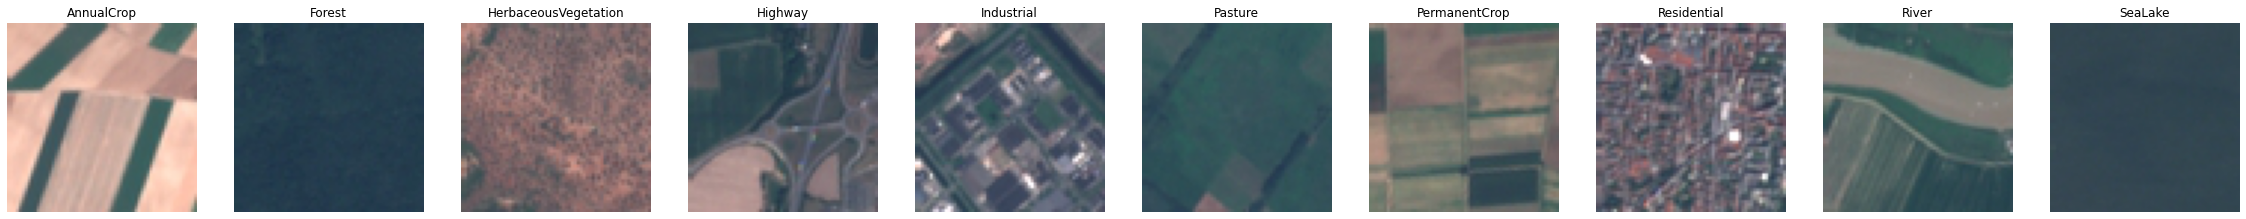

In [ ]:
displaying_random()

## Analyze

We expected to find values misclassified because they have many similarities with other lands.

### Color 

Pictures below present groups that have **color** similarities:

- **One major color** : SeaLake, Forest
- **Two major color** : River
- **Few major color** : AnnualCrop, Highway, Permanent Crop
- **Many different color** : Residential, Industrial 

### Texture/Form

Pictures below present groups that have **texture/shape** similarities:
- **Bushy** texture : forest and Herbaceous Vegetation
- **Rectangle same colors** :  form: Anual crop, Permanent crop, River
- **Curved line** : form: Highway, River
- **Many rectangle different colors** : form : Industrial, Residential 



## Functional 

Pictures below present groups that have functional similarities:

- **urban-related** : environments : residential, highway, industrial
- **man-shaped natural** : environments : annual crop, permanent crop, pasture
- **natural environment** : sea/lake, forest, river
- **more erratic landscape** : herbaceous.

#  <a id="dim3"></a> 3. Data Processing

In this section, we will discuss the normalization process, the creation of train/test datasets, and the development of a transformation pipeline.

**About normalization:** 

During the data processing step in computer vision tasks, it is common to normalize the images to improve the performance of the deep learning models. However, finding the appropriate strategy for normalizing the images can be a challenging task.

One of the first questions encountered is how to normalize the images to fit into the pipeline. This involves choosing an appropriate normalization technique that can ensure consistency in the dataset and facilitate the training of the deep learning model.

In this context, the EuroSAT dataset does not have a default normalization method, and therefore, several options are available:

Option 1: Calculate the mean and standard deviation for each channel (R, G, B) separately and use the transform.Normalize function in PyTorch to apply normalization to the images.

Option 2: Skip normalization and risk the possibility of the gradients exploding or vanishing during training.

Option 3: Use the normalization parameters from another dataset, such as the alien/predictors dataset found on Kaggle.


Due to time constraints and the fact that the main objective is not to achieve the best possible results, I have decided to choose Option 3 for normalization of the EuroSAT dataset.
It involves using the normalization parameters from another dataset, such as the alien/predictors dataset on Kaggle.

By using the normalization parameters from another dataset, we can save time and avoid the need to calculate the mean and standard deviation for each channel separately. This can be particularly useful in scenarios where time and computational resources are limited.

However, it is important to note that using the normalization parameters from another dataset may not necessarily be optimal for the EuroSAT dataset, as the two datasets may have different characteristics. As a result, it may not produce the best possible results. Nonetheless, since the primary objective of the project is not to achieve the best possible results, using the normalization parameters from another dataset is a reasonable and pragmatic option that can help save time and resources.

## Normalization: size check

In [ ]:
print("The variable imSize store all different size existing in the dataset")
imSize = np.unique([Image.open(img_path).size for img_path in loading_dataset("AnnualCrop")])
if len(imSize) == 1:
  print(f"All pictures have a similar size of {imSize}x{imSize} pixels.")

The variable imSize store all different size existing in the dataset
All pictures have a similar size of [64]x[64] pixels.


## Normalization action

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

## Dividing train/test split

In [ ]:
import splitfolders # or import splitfolders
input_folder = "/content/2750"
output = "/content/divide/2750" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 27000 files [00:07, 3533.23 files/s]


## Transform pipeline

In [ ]:
transform_pipelines = {
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ]),
}

In [ ]:
train_root = "/content/divide/2750/train"
val_root = "/content/divide/2750/val"

In [ ]:
image_datasets = {
    'train': 
    datasets.ImageFolder(train_root, transform_pipelines['train']),
    'validation': 
    datasets.ImageFolder(val_root, transform_pipelines['validation'])
}

In [ ]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 21600
     Root location: /content/divide/2750/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
                RandomAffine(degrees=[0.0, 0.0], scale=(0.8, 1.2), shear=[-10.0, 10.0])
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ), 'validation': Dataset ImageFolder
     Number of datapoints: 2700
     Root location: /content/divide/2750/val
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [ ]:

dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets["train"], batch_size= 32, shuffle=True, num_workers=0),
    'validation':
    torch.utils.data.DataLoader(image_datasets["validation"], batch_size= 32, shuffle=False, num_workers=0)
}

#  <a id="dim4"></a> 4. Model strategy & transfer

## How to choose the model ?

When choosing a model, it's important to consider both:
* computational resources and
* model performance. 

In this context, **computational resources** refer to the amount of memory and processing power required to run the model. Models that consume a large amount of resources may not be practical because they require expensive hardware to run that I don't have.

In addition to **model performance**, it's also important to consider model performance. This can be assessed using metrics such as accuracy, precision, recall, and F1 score. In the context of image classification, accuracy is one of the most commonly used metrics. However, accuracy alone may not always be sufficient to evaluate a model's performance, especially when dealing with imbalanced datasets or when the cost of misclassification varies for different classes.

To address this issue, PyTorch provides accuracy metrics for both:
* the top-1 prediction (accuracy 1) and
* the top-5 predictions (accuracy 5). 

The accuracy 1 represents the percentage of images for which the model's top prediction is correct, while accuracy 5 represents the percentage of images for which the correct label is among the model's top 5 predictions.

In the case of EuroSAT dataset, since we are dealing with 10 classes, accuracy 5 is particularly important. After reviewing the accuracy metrics, it appears that ResNet50 has a high level of accuracy and may be a suitable choice for this task. **ResNet50** is a convolutional neural network that has been trained on the ImageNet dataset, which contains over 1.2 million images and 1,000 classes. Its high accuracy on ImageNet and transfer learning capabilities make it a popular choice for various computer vision tasks.


In [ ]:
def get_model_param_info(model, information="before transfering the model"):
  # Find total parameters and trainable parameters
  total_params = sum(p.numel() for p in model.parameters())
  total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  
  print(f'\nNumber of model parameters {information}:')
  print(f'  {total_params:,} total parameters.')
  print(f'  {total_trainable_params:,} training parameters.')

  return total_params, total_trainable_params

In [ ]:
model = models.resnet50(pretrained=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
total_params_before, total_trainable_params_before = get_model_param_info(model)


Number of model parameters before transfering the model:
  25,557,032 total parameters.
  25,557,032 training parameters.


In [ ]:
# Transfer
for param in model.parameters():
    param.requires_grad = False

In [ ]:
# Replacing the last layer
new_fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 10))

model.fc = new_fc.to(device)

## How to choose hyper parameters ?

When it comes to choosing a loss function for classification problems, CrossEntropyLoss is a commonly used criterion. This loss function is often used in multi-class classification tasks because it provides a way to measure the difference between predicted and actual probabilities. It essentially measures the distance between the predicted probability distribution and the true probability distribution of the target class.

For optimization techniques, stochastic gradient descent (SGD) and Adam's Method are two commonly used approaches. SGD is a first-order optimization algorithm that updates the model parameters using the gradient of the loss function with respect to the parameters. It has a constant learning rate, which can be adjusted to control the step size of the updates.

Adam, on the other hand, is a more advanced optimization algorithm that uses adaptive learning rates for each parameter. It combines the advantages of two other optimization methods, namely AdaGrad and RMSProp. AdaGrad adapts the learning rates to each parameter based on their historical gradients, while RMSProp uses a moving average of the squared gradients to adjust the learning rates. Adam incorporates both of these techniques, along with momentum, to converge faster and often yields better results compared to SGD.


In [ ]:
criterion = nn.CrossEntropyLoss() 
# Optimzer
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)
# LR scheduler
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                    cooldown=4,
                                                    verbose=True)

In [ ]:
total_params_after, total_trainable_params_after = get_model_param_info(model, information = "after transfering the model")


Number of model parameters after transfering the model:
  23,771,594 total parameters.
  263,562 training parameters.


## Compare model before and after transfering

In [ ]:
transfering_effect_on_param = pd.DataFrame({"Parameters": [total_params_after - total_trainable_params_after, 
                             total_trainable_params_after,  
                             total_params_before - total_trainable_params_before,
                             total_trainable_params_before],
              "Transfering": ["After transfering", "After transfering", "Before transfering", "Before transfering"], 
              "Trainable parameters": ["Not trainable", "Trainable", "Not trainable", "Trainable"], 
              "Sort":[1,1,0,0]})

title = "Transfering effect on parameters"

fig = px.bar(transfering_effect_on_param.sort_values(by="Sort"), x= "Transfering", y= "Parameters", color="Trainable parameters", title=title)

fig.show()


We went from 25 557 032 trainable parameters to only 262 562 which is considerably less!

#  <a id="dim5"></a> 5. Model training & model loading

This step is expected to take a long time since deep learning models typically require significant computational resources and time to train. Once the model is trained, it will be saved and loaded for evaluation.

## Training

In [ ]:
def train_model(model, criterion, optimizer, num_epochs=5):
    last_end = time.time()
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model =  model.train() ## TODO: set model to training mode
            else:
                model =  model.eval() ## TODO: set model to evaluation mode

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                print("labels:", labels)
                inputs = inputs.to(device) ## TODO: set inputs to the right device
                labels = labels.to(device) ## TODO: set labels to the right device

                outputs = model(inputs) ## TODO: get model outputs
                print("output shape:", outputs.shape)
                loss = criterion(outputs, labels) ## TODO: compute loss

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward() ## TODO: in training mode you have to perform gradient step
                    optimizer.step() ## to optimize the network

                _, preds = torch.max(outputs, 1) ## TODO: get the label prediction
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])
            epoch_time = time.time() - last_end
            last_end = time.time()
            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc))
            if phase == 'validation':
                lr_scheduler.step(epoch_loss)
                print('-' * 10)
    return model

In [ ]:
model_trained = train_model(model, criterion, optimizer, num_epochs=10)

Epoch 1/10
----------
labels: tensor([6, 3, 4, 9, 1, 4, 2, 1, 6, 3, 0, 4, 7, 0, 3, 8, 5, 8, 3, 3, 8, 5, 4, 7,
        0, 7, 7, 0, 4, 8, 2, 8])
output shape: torch.Size([32, 10])
labels: tensor([4, 2, 8, 6, 8, 1, 4, 6, 9, 0, 4, 1, 3, 3, 8, 3, 5, 7, 8, 9, 7, 8, 8, 2,
        1, 5, 6, 5, 7, 1, 8, 9])
output shape: torch.Size([32, 10])
labels: tensor([4, 0, 3, 7, 2, 2, 8, 6, 2, 8, 5, 3, 8, 3, 4, 5, 1, 6, 7, 8, 1, 7, 5, 6,
        9, 6, 2, 3, 2, 8, 8, 9])
output shape: torch.Size([32, 10])
labels: tensor([8, 5, 6, 7, 5, 7, 7, 0, 0, 9, 9, 7, 9, 5, 0, 4, 3, 1, 4, 9, 7, 3, 0, 9,
        1, 9, 4, 5, 8, 5, 4, 7])
output shape: torch.Size([32, 10])
labels: tensor([5, 9, 3, 4, 7, 3, 3, 4, 5, 9, 7, 9, 3, 7, 3, 4, 5, 1, 3, 7, 4, 5, 3, 0,
        8, 7, 8, 8, 0, 0, 0, 1])
output shape: torch.Size([32, 10])
labels: tensor([7, 0, 8, 1, 7, 2, 3, 7, 9, 8, 1, 7, 4, 8, 9, 4, 5, 6, 6, 3, 8, 0, 2, 6,
        5, 5, 1, 3, 3, 2, 9, 7])
output shape: torch.Size([32, 10])
labels: tensor([0, 8, 0, 8, 6, 4, 5, 1, 2,

KeyboardInterrupt: ignored

## Model saving

In [ ]:
pickle.dump(model_trained, open("model/saved_model", 'wb'))

## Model loading

In [ ]:
loaded_model = pickle.load(open("model/saved_model",'rb'))

#  <a id="dim7"></a> 6. Model evaluation


For model evaluation, the logits returned by the model are transformed into probabilities using the F.softmax function. This is done because the probabilities are easier to interpret and provide a measure of how confident the model is in its predictions. The softmax function converts the logits into a probability distribution by computing the exponential of each logit and then normalizing the resulting values. Using a probability-based metric allows for a more nuanced evaluation of the model's performance and can provide insights into areas where the model is particularly strong or weak. Additionally, it can help identify cases where the model may be overly confident in its predictions, which can be useful in identifying areas for improvement.

## Preparing functions

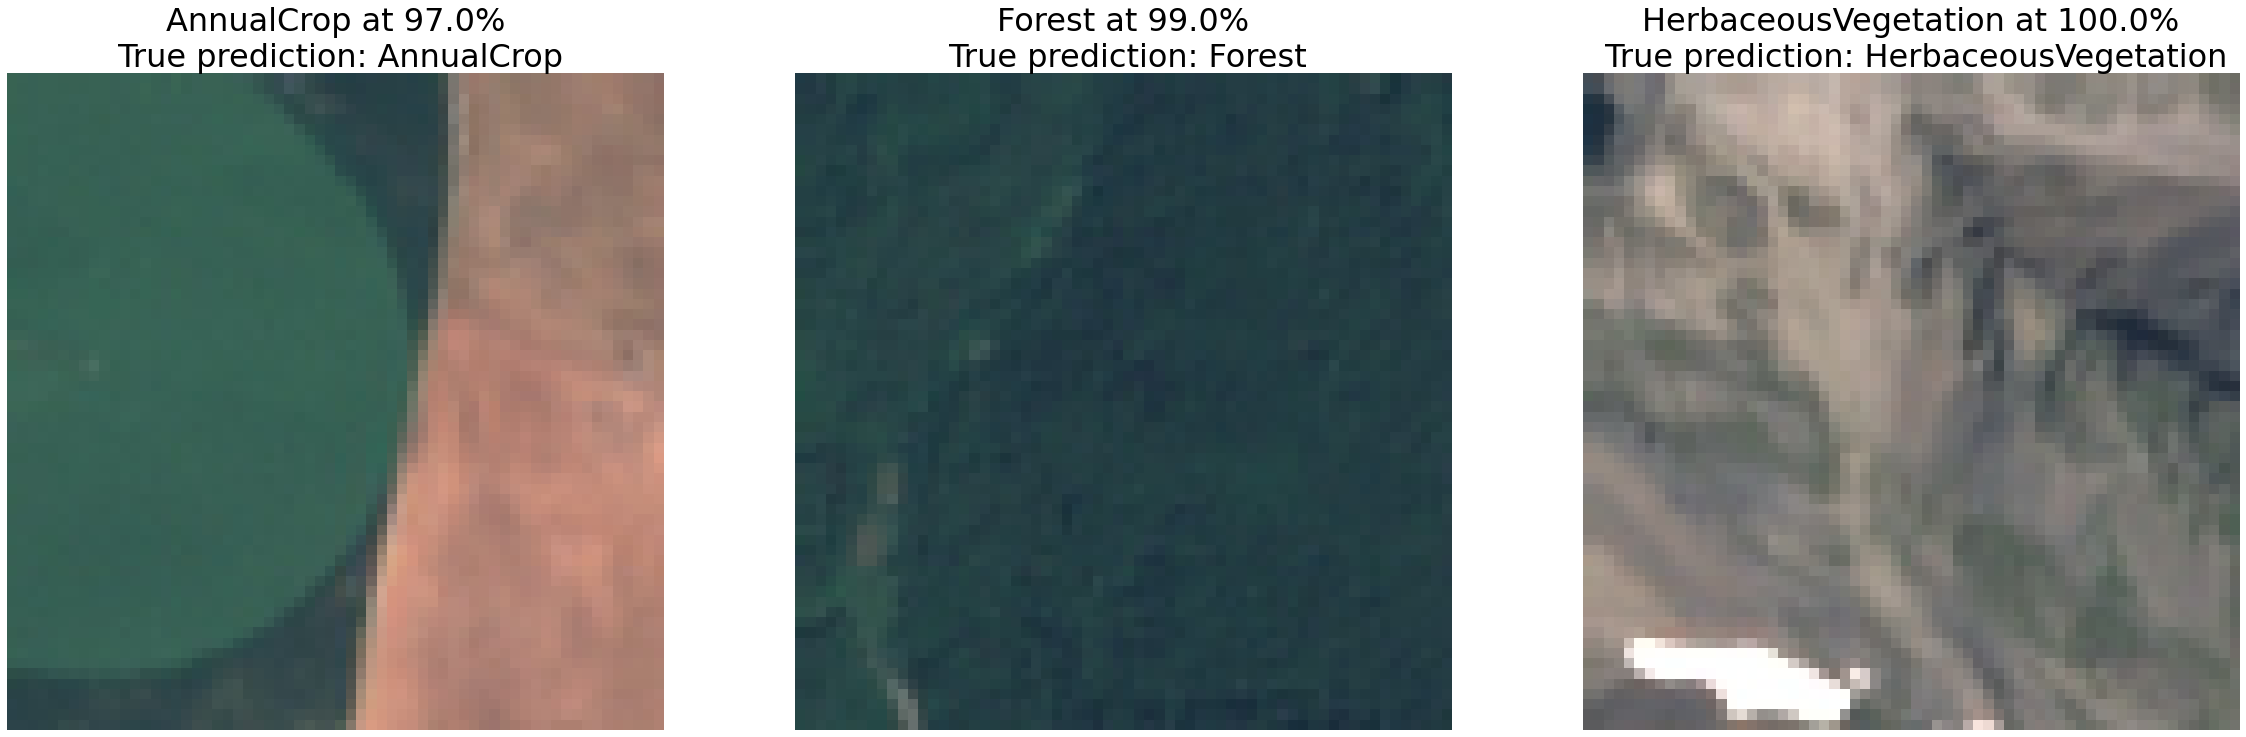

In [ ]:
validation_img_paths = ["/content/divide/2750/val/AnnualCrop/AnnualCrop_10.jpg",
 "/content/divide/2750/val/Forest/Forest_1003.jpg",
"/content/divide/2750/val/HerbaceousVegetation/HerbaceousVegetation_10.jpg"]


def display_image_prediction(validation_img_paths, display=False, no_return=False):

  img_list = [Image.open(img_path) for img_path in validation_img_paths]
  validation_batch = torch.stack([transform_pipelines['validation'](img).to(device)
                                      for img in img_list])
  pred_logits_tensor = loaded_model(validation_batch)
  pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()
  pred_lands = {}
  image_pred = {}

  if display == True: 
    fig, axs = plt.subplots(1, len(img_list), figsize=(40, 20))


  for i, img in enumerate(img_list):
    image_name = validation_img_paths[i].split("/")[-1]
    pred_lands[f"{image_name}"] = {}
    for index_land, land in enumerate(type_lands):
      pred_lands[f"{image_name}"][land] = round(pred_probs[i, index_land],2)
      image_pred[validation_img_paths[i]] = max(pred_lands[image_name], key=pred_lands[image_name].get)

      if display == True: 
        ax = axs[i]
        ax.axis('off')
        best_pred_value = round(max(pred_lands[image_name].values())*100,1)
        best_pred_label = max(pred_lands[image_name], key=pred_lands[image_name].get)
        y_true = image_name.split("_")[0]
        title = f"{best_pred_label} at {best_pred_value}%\n True prediction: {y_true}"
        ax.set_title(title, fontsize=32)
        ax.imshow(img)
  if no_return == False:
    return(pred_lands, image_pred)
  else:
    return(None)


pred_lands_test, image_pred_test = display_image_prediction(validation_img_paths, display = True)

In [ ]:
divide_path_test = {}

for land in type_lands:
  divide_path_test[land] = glob.glob(f"/content/divide/2750/test/{land}/*.jpg")

In [ ]:

pred_lands = {}
image_pred = {}
for land in type_lands:
  pred_lands[land], image_pred[land] = display_image_prediction(divide_path_test[land])

pred_lands = {}
for land in type_lands:
  pred_lands[land]= display_image_prediction(divide_path_test[land])[1]


In [ ]:

L = []
percent = []
for land in type_lands:
  df = pd.DataFrame(pd.DataFrame(pred_lands[land].values()).value_counts()).rename(columns={0:land})
  L.append(df)
  percent.append(pd.DataFrame(df[land].apply(lambda x: round(x/df[land].sum()*100))))

percentage_good_pred = pd.concat(percent, axis=1).fillna(0)
confusion_matrix = pd.concat(L, axis=1).fillna(0)

percentage_good_pred.to_csv("percentage_good_pred.csv")
confusion_matrix.to_csv("confusion_matrix.csv")


'\n\npred_lands = {}\nimage_pred = {}\nfor land in type_lands:\n  pred_lands[land], image_pred[land] = display_image_prediction(divide_path_test[land])\n\npred_lands = {}\nfor land in type_lands:\n  pred_lands[land]= display_image_prediction(divide_path_test[land])[1]\n\nL = []\npercent = []\nfor land in type_lands:\n  df = pd.DataFrame(pd.DataFrame(pred_lands[land].values()).value_counts()).rename(columns={0:land})\n  L.append(df)\n  percent.append(pd.DataFrame(df[land].apply(lambda x: round(x/df[land].sum()*100))))\n\npercentage_good_pred = pd.concat(percent, axis=1).fillna(0)\nconfusion_matrix = pd.concat(L, axis=1).fillna(0)\n\npercentage_good_pred.to_csv("percentage_good_pred.csv")\nconfusion_matrix.to_csv("confusion_matrix.csv")\n\n'

In [ ]:
# If needed 

#percentage_good_pred = pd.read_csv("percentage_good_pred.csv", index_col=0)

In [ ]:
#If needed

#confusion_matrix = pd.read_csv("confusion_matrix.csv", index_col=0)

## Analyse on sucess predictions

In [ ]:
display_percent = {"Percentage prediction": [], "Sucess of prediction": [], "Land type": []}
for col in percentage_good_pred.columns:
  display_percent["Percentage prediction"].append(percentage_good_pred[col][col])
  display_percent["Sucess of prediction"].append(True)
  display_percent["Percentage prediction"].append(100-percentage_good_pred[col][col])
  display_percent["Sucess of prediction"].append(False)
  display_percent["Land type"].append(col)
  display_percent["Land type"].append(col)

display_percent_df = pd.DataFrame(display_percent)


In [ ]:

fig = px.bar(display_percent_df.sort_values(by="Percentage prediction", ascending=False),
             x= "Land type", 
             y= "Percentage prediction",
             color = "Sucess of prediction")
fig.show()

The best predictions are on : Residential, Forest, SeaLake, HerbaceousVegetation

The worst predictions are on: Pasture, River, Industrial, PermanentCrop, HighWay


**It exactly corresponds to class that have less data than others !**

Highway, Industrial, PermanentCrop and River have 2500 images.
Pasture have only 2000 images, so 1/3 less than the other.

We can see that the worst prediction is for Highway land!

In [ ]:
percentage_good_pred

,AnnualCrop,Forest,HerbaceousVegetation,Highway,Industrial,Pasture,PermanentCrop,Residential,River,SeaLake
0,,,,,,,,,,
AnnualCrop,92.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0
Forest,0.0,96.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0
HerbaceousVegetation,0.0,2.0,94.0,2.0,0.0,2.0,10.0,1.0,0.0,1.0
Highway,1.0,0.0,1.0,75.0,0.0,1.0,1.0,0.0,4.0,1.0
Industrial,0.0,0.0,0.0,1.0,88.0,0.0,0.0,0.0,0.0,0.0
Pasture,0.0,1.0,1.0,1.0,0.0,91.0,1.0,0.0,2.0,1.0
PermanentCrop,3.0,0.0,2.0,5.0,1.0,2.0,86.0,0.0,3.0,0.0
Residential,0.0,0.0,0.0,1.0,9.0,0.0,0.0,98.0,0.0,0.0
River,3.0,0.0,2.0,11.0,2.0,1.0,0.0,0.0,89.0,2.0


Thanks to this confusion matrix by percentage, this landscape is very confused with the River, in fact this is showing the geometrical issue because both of them are representing curve line. What about the others misclassification on Highway land?

Looking on other lands: 
There is effectively bad prediction as expected because of texture/shape similarities:

- Bushy texture : Forest and Herbaceous Vegetation. 
- Rectangle same colors form: Anual crop, Permanent crop, River. 
- Curved line form: Highway, River.  
- Many rectangle different colors form : Industrial, Residential.  



In [ ]:
Highway = pd.DataFrame(pred_lands["Highway"], index=["Highway"]).transpose().reset_index()
misclassified = list(Highway[Highway.Highway != "Highway"]["index"])


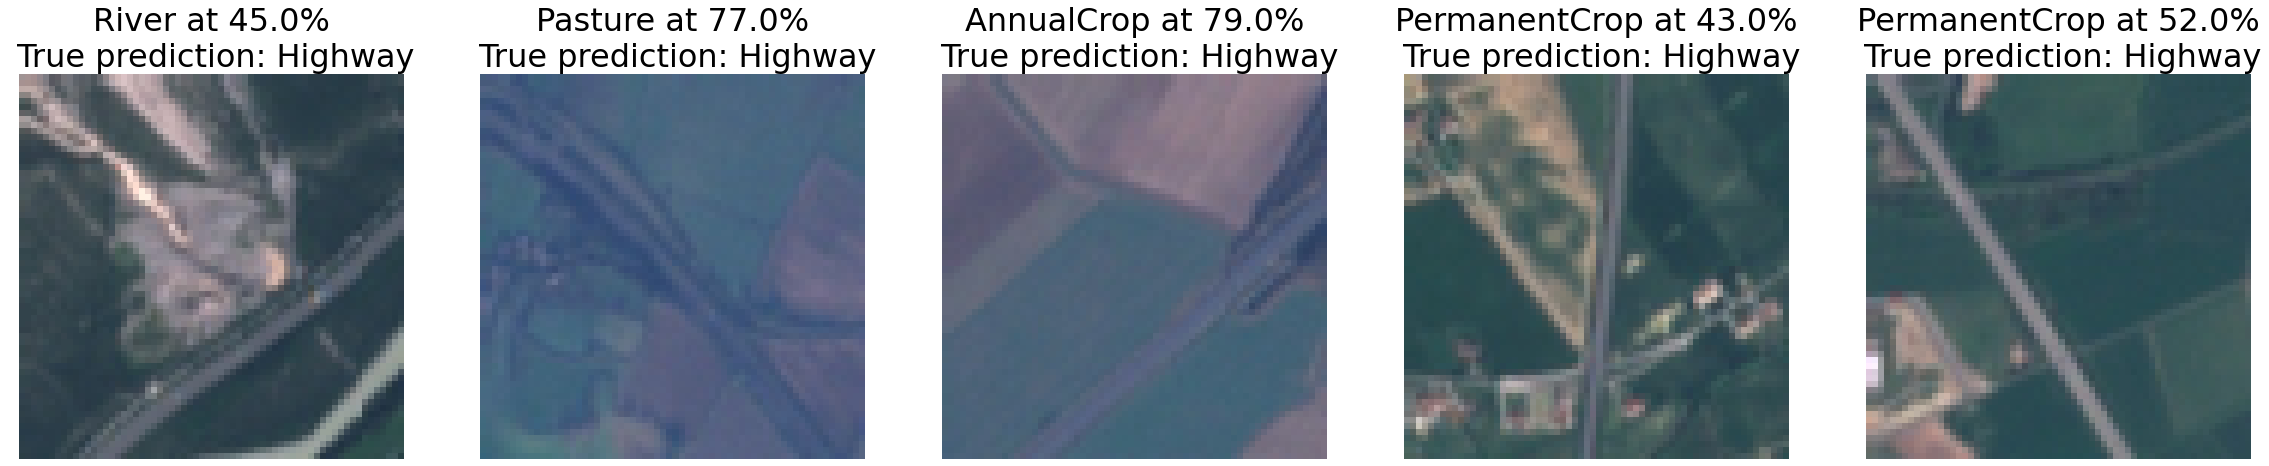

In [ ]:
display_image_prediction(misclassified[0:5], display=True, no_return=True)

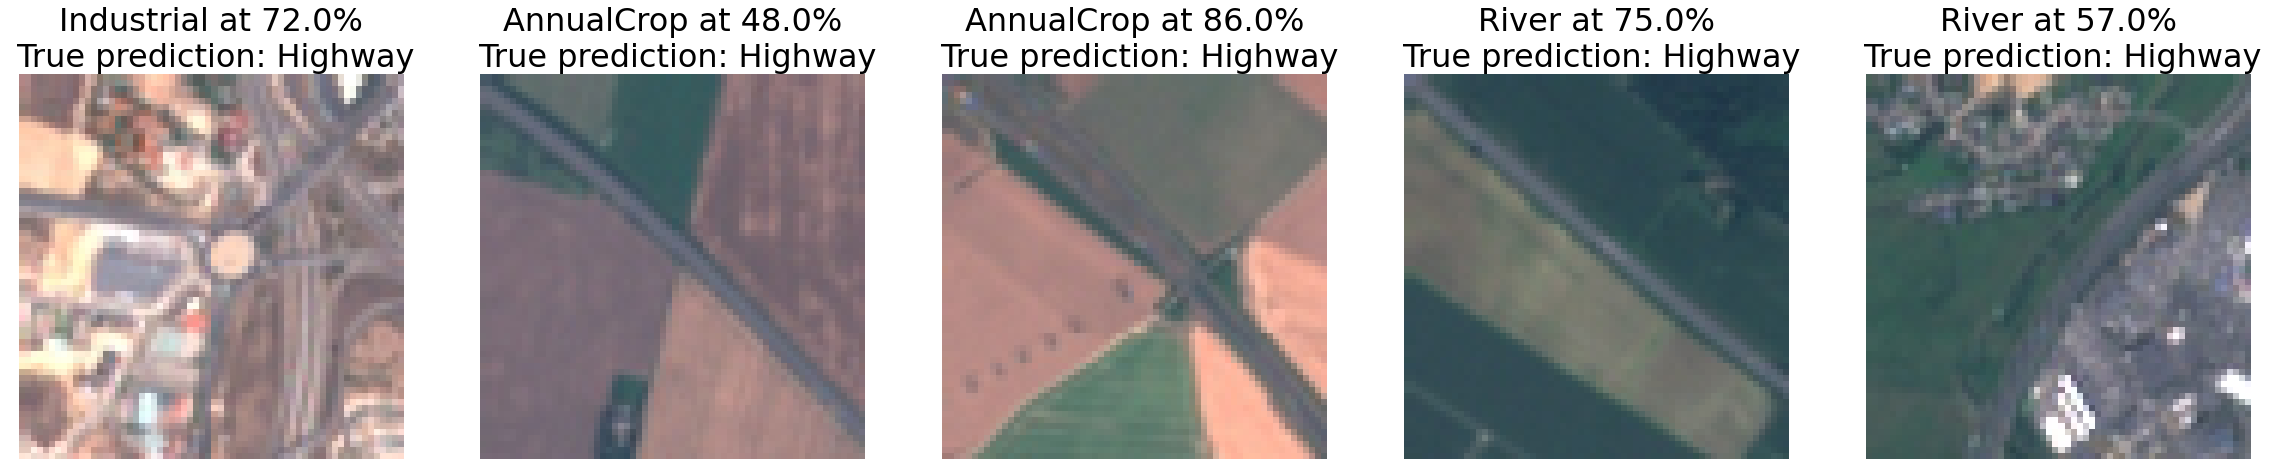

In [ ]:
display_image_prediction(misclassified[5:10], display=True, no_return=True)

#### We can see on this bad predictions that is it when several lands in the same pictures ! 

# 💡 Analyze on prediction to find a way to propose a new pipeline

## Analyze on the maximum probability given by the model

For each image, the model will give a probability that the imag

In [ ]:
image_pred_percent = {}
for land in type_lands:
  image_pred_percent[land]= display_image_prediction(divide_path_test[land])[0]

In [ ]:
def span_1value(x): 
  if 0<= x < 0.99:
    return("inferior at 1")
  else:
    return("equal to 1")

In [ ]:
def span3(x): 
  span_ultime = "superior or equal to 0.9"
  if 0<= x < 0.6:
    return("between 0 and 0.6")
  elif 0.6<= x < 0.8:
    return("between 0.6 and 0.8")
  elif 0.8<= x < 0.9:
    return("between 0.8 and 0.9")
  else:
    return("superior or equal to 0.9")

In [ ]:
def display_spand_land_function(span3, span_ultime = "superior or equal to 0.9"):
  
  display_span_land = {"Type of lands": [], "Interval": []}
  for land in image_pred_percent.keys():
    values_pred = [max(list(image_pred_percent[land][key].values())) for key in image_pred_percent[land].keys()]
    values_pred_span = [span3(x) for x in values_pred]
    display_span_land["Interval"].extend(values_pred_span)
    display_span_land["Type of lands"].extend([land]*len(values_pred_span))

  lenght_land = {land:len(image_pred_percent[land]) for land in image_pred_percent.keys()}

  display_span_land_df = pd.DataFrame(display_span_land)
  display_span_land_df["test"] = [1]*display_span_land_df.shape[0]

  display_span_land_df2 = display_span_land_df.groupby(["Type of lands", "Interval"]).agg('count')
  display_span_land_df2 = display_span_land_df2.reset_index()
  display_span_land_df2["Total"] = display_span_land_df2["Type of lands"].apply(lambda x: lenght_land[x])

  display_span_land_df2["percent"]  = round(display_span_land_df2["test"] / display_span_land_df2["Total"] * 100)

  order = list(display_span_land_df2[
                      display_span_land_df2.Interval == span_ultime
                      ].sort_values(by="percent")["Type of lands"])

  order_2 = {order[i]:i for i in range(len(order))}
  display_span_land_df2["sortBy"] = display_span_land_df2["Type of lands"].apply(lambda x: order_2[x])

  fig = px.bar(display_span_land_df2.sort_values(by="sortBy"),
        x="Type of lands",
        y="percent",
        color = "Interval")
  fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':order})
  return(fig, order_2)
  
order_2 = display_spand_land_function(span3)[1]
display_spand_land_function(span3)[0]

In [ ]:
display_spand_land_function(span_1value, "equal to 1")[0]

There is really few image classified at 1 for highway and River instead of Forest and Sealake. 

We can another time notice that it exactly corresponds to class that have less data than others but what is interesting is to see that SeaLake or Forest, that are lands which have the less probability to be cross on the same picture with an other land have the best values.

## Analyze with examples

In [ ]:
lands_first_img_paths_df = pd.DataFrame(lands_first_img_paths)
lands_first_img_paths_df["Type of lands"] = lands_first_img_paths_df[0].apply(lambda x: x.split("/")[-2])
lands_first_img_paths_df["sortBy"] = lands_first_img_paths_df["Type of lands"].apply(lambda x: order_2[x])

In [ ]:
first_img_range = list(lands_first_img_paths_df.sort_values(by="sortBy", ascending=False)[0])

In [ ]:
def display_image_seuil(thresold=0.99, superior=True, begin_value=0, final_value=4):

  path_100_pred = []
  for land in order_2: 
    xx = pd.DataFrame(image_pred_percent[land]).transpose()
    if superior == True:
      path_100_pred.append(f"/content/divide/2750/test/{land}/{xx[xx[land] >= thresold].index[1]}")
    else:
      path_100_pred.append(f"/content/divide/2750/test/{land}/{xx[xx[land] < thresold].index[1]}")
  
  return(display_image_prediction(path_100_pred[0:4], display=True, no_return=True))

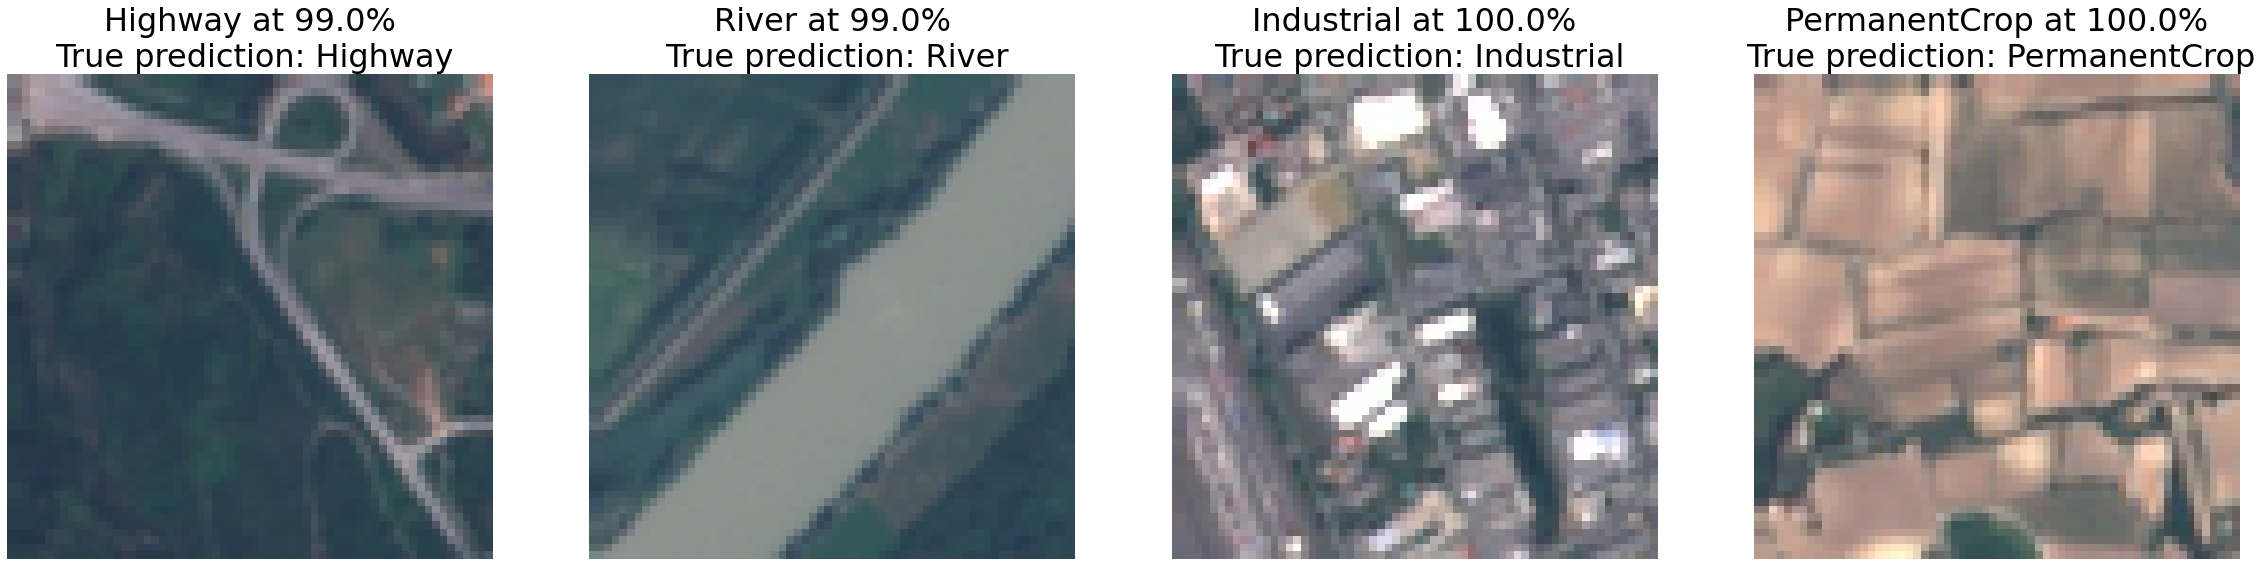

In [ ]:
display_image_seuil(x=0.99, superior=True, begin_value=0, final_value=4)

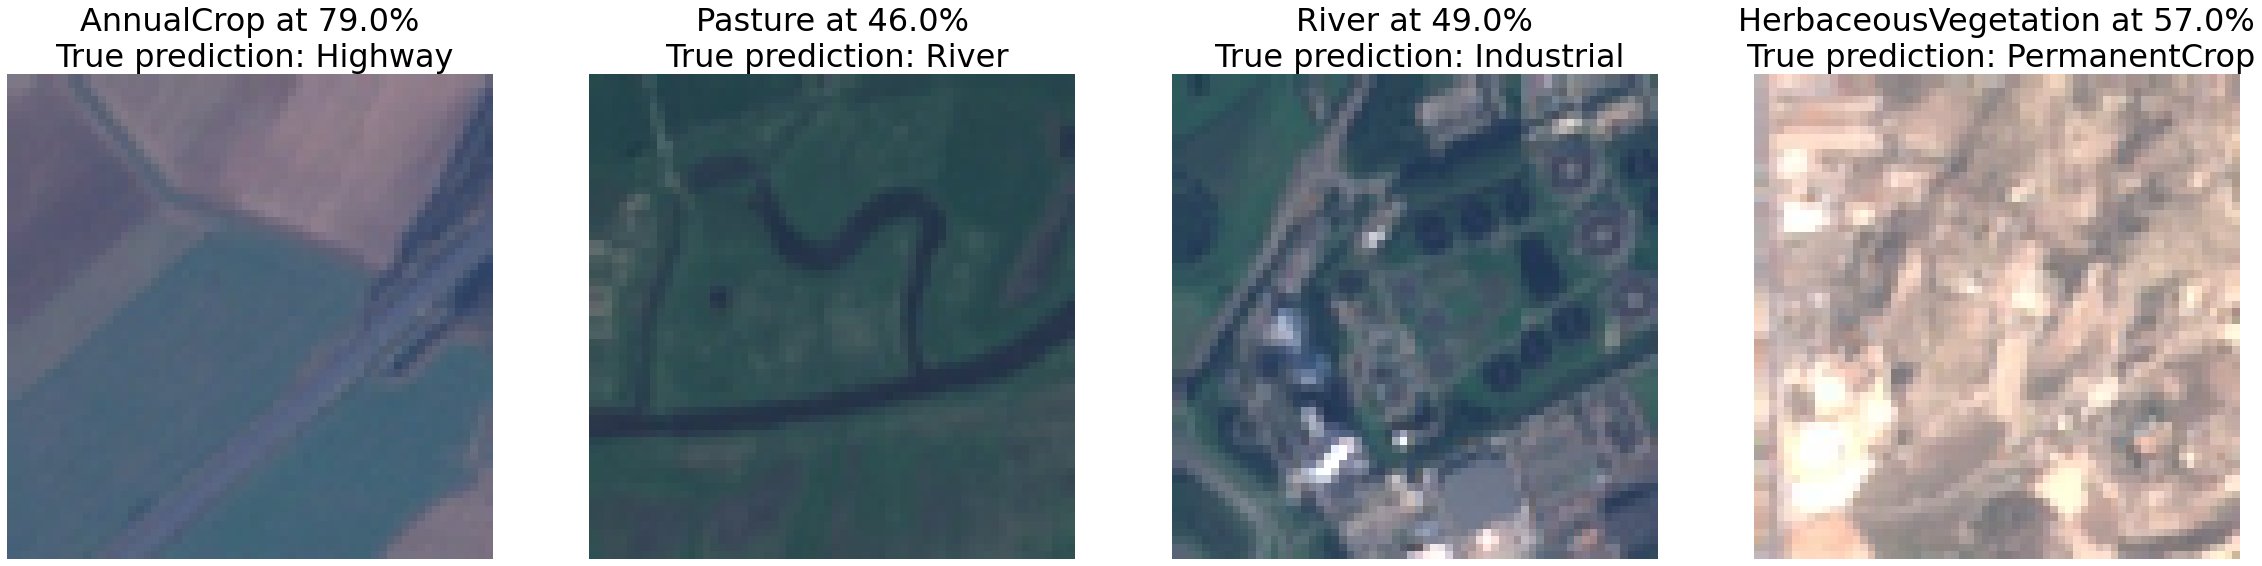

In [ ]:
display_image_seuil(x=0.4, superior=False, begin_value=0, final_value=4)

On the right pictures I would have say by eyes that its it HerbaceousVegetation. It seems that there is a bad labelling here. 
We should have taking it into account.

#  <a id="dim10"></a> 7. Conclusions

## Two factors were predominant in this research:

1) **Color**: Some lands are more homogeneous in color when compared to others that have multiple colors. It was found that there are poorly classified images that have color similarities.
> Training the model on black and white data could help remove color biases in the model.

2) **Shapes/Texture**: There are similarities in shape and texture, such as the presence of large rectangles, small rectangles, curves, or bushes, that cause misclassifications.
> One solution could be to rezoom on the images to eliminate the impact of shapes and focus on the textures instead. Another solution could be to research and develop texture-based methods to improve the classification of images.

## Addressing factors contributing to bad predictions:

1) **The rate of unbalanced data** may have had an impact on the accuracies. It was observed that lands with the least number of images had lower accuracies.
> Balancing the dataset by oversampling the minority class, undersampling the majority class, or using a combination of both techniques can help improve the performance of the model.

2) **The crossings between different lands** can cause confusion in classification. For example, a highway that passes through an annual crop can be misclassified.
> One possible solution is to prioritize the rules for detecting certain types of land according to the business needs.    
> Another solution could be to develop a model that is able of detecting multiple types of land in a single image.

3) Classification accuracy crucially depends on the quality of labeling. **Mislabeling** some images can significantly impact the model's performance.
> One solution to this problem could be to manually review the images with low maximum probabilities and relabel them. Additionally, exploring state-of-the-art methods for improving data quality and labeling could also be helpful.

## Interesting next steps

1) **Explanability**   
Further implementation will involve to underline the pixels contributing the most in the input images leading to the model’s outputs. Those methods can be separated in two groups:
**perturbation-based**: Generate perturbed inputs and analyze the evolution of the output of the model for those perturbed inputs. An important feature will greatly change the output when modified. (Those methods are black-box methods.)
**back-propagation**: Use the weights of the model to back-propagate importances from the output to the features. It uses the weights of the model and the neurons activations from a forward pass. Many methods use the gradient of the model, they are consicered back-propagation methods.

> A. Testing on manually modified images such as black and white, to assess the efficacy of classification.   
> B. Using [Xplique library](https://github.com/deel-ai/xplique\)

2) Future work will explore the use of other models to improve classification accuracy, while also prioritizing the completion of the initial phase involving comprehensive testing and analysis of the chosen strategy.